<h3>Select 200 random images from Account

In [2]:
import os
import shutil
import glob
import random

In [6]:
# Get 200 Random Unsprung images
to_be_moved = random.sample(glob.glob("./unsprungAbove/*.jpg"), 200)
for f in enumerate(to_be_moved):
    shutil.move(str(f[1]), "./unsprung200")

In [7]:
# Get 200 Random Yeti images
to_be_moved = random.sample(glob.glob("./yetiAbove/*.jpg"), 200)
for f in enumerate(to_be_moved):
    shutil.move(str(f[1]), "./yeti200")

In [8]:
# Get 200 Random Santa Cruz images
to_be_moved = random.sample(glob.glob("./santacruzAbove/*.jpg"), 200)
for f in enumerate(to_be_moved):
    shutil.move(str(f[1]), "./santa200")

In [10]:
# Get 200 Random ReEvo images
to_be_moved = random.sample(glob.glob("./reevoAbove/*.jpg"))
for f in enumerate(to_be_moved):
    shutil.move(str(f[1]), "./reevo200")

<h3> Method 1: Google Cloud Vision

In [ ]:
## Insall Google Cloud Vision
# pip install --upgrade google-cloud-vision

In [ ]:
## One of the missing requirements
# pip install protobuf

In [ ]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="C:/Users/Asus/Documents/SMU/Y4S2 (Y4S1)/(2) IS434 SA/Project/arched-aleph-345304-2d240c837f0d.json"

Sample code

In [ ]:
import io
import os

# Imports the Google Cloud client library
from google.cloud import vision

# Instantiates a client
client = vision.ImageAnnotatorClient()

# The name of the image file to annotate
file_name = os.path.abspath('resources/wakeupcat.jpg')

# Loads the image into memory
with io.open(file_name, 'rb') as image_file:
    content = image_file.read()

image = vision.Image(content=content)

# Performs label detection on the image file
response = client.label_detection(image=image)
labels = response.label_annotations

print('Labels:')
for label in labels:
    print(label.description)

In [ ]:
def detect_properties(path):
    """Detects image properties in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.image_properties(image=image)
    props = response.image_properties_annotation
    print(props.dominant_colors)
    print('Properties:')

    for color in props.dominant_colors.colors:
        print('fraction: {}'.format(color.pixel_fraction))
        print('\tr: {}'.format(color.color.red))
        print('\tg: {}'.format(color.color.green))
        print('\tb: {}'.format(color.color.blue))
        print('\ta: {}'.format(color.color.alpha))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [ ]:
detect_properties("C:/Users/Asus/Documents/SMU/Y4S2 (Y4S1)/(2) IS434 SA/Project/unsprung200/2022-02-18_00-49-30_UTC_3.jpg")

In [ ]:
path_of_the_directory= 'C:/Users/Asus/Documents/SMU/Y4S2 (Y4S1)/(2) IS434 SA/Project/unsprung200/'
print("Files and directories in a specified path:")
for filename in os.listdir(path_of_the_directory):
    f = os.path.join(filename)
    with open(path_of_the_directory + "USColourJSON/" + file_name, "w") as json_file:
        json.dump(props, json_file)
#     if os.path.isfile(f):
    print(f)

In [ ]:
for file_name in [file for file in os.listdir(path_to_json) if file.endswith('.json')]:
  with open(path_to_json + file_name) as json_file:

<b> Try plotting piechart 11pm </b>
* Function to create hex code
* Plot pie chart by using score / sum of all scores 
* Plot 20 x 10 pie charts

In [ ]:
# Function to convert rgb to hex
# For each r, g, b --> Input into this function
def rgb_to_hex(rgb):
    r,g,b=rgb
    return '#%02x%02x%02x' % (r,g,b)

print(rgb_to_hex((int(color.color.red), int(color.color.green), int(color.color.blue))))


In [ ]:
# for each image
dom_col_list = []
dom_frac_list = []
    # for each color
    color_hex = rgb_to_hex((int(color.color.red), int(color.color.green), int(color.color.blue)))
    dom_col_list.append(color_hex)
    
    dom_frac_list.append(color.pixel_fraction)
    
    #plot pie chart 
    fig, axes= plt.subplots(20, 10)

<h3> Method 2: Cluster colours 

In [1]:
# pip install opencv-python
# !pip3 install imutils
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import imutils



Bad key text.latex.preview in file C:\Users\Asus\Documents\anacondaaa\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\Asus\Documents\anacondaaa\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\Asus\Documents\anacondaaa\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import imutils

clusters = 5 # try changing it

img = cv2.imread('C:/Users/Asus/Documents/SMU/Y4S2 (Y4S1)/(2) IS434 SA/Project/unsprung200/2017-03-22_16-21-09_UTC_2.jpg')
org_img = img.copy()
print('Org image shape --> ',img.shape)

img = imutils.resize(img,height=200)
print('After resizing shape --> ',img.shape)

flat_img = np.reshape(img,(-1,3))
print('After Flattening shape --> ',flat_img.shape)

kmeans = KMeans(n_clusters=clusters,random_state=0)
kmeans.fit(flat_img)

dominant_colors = np.array(kmeans.cluster_centers_,dtype='uint')

percentages = (np.unique(kmeans.labels_,return_counts=True)[1])/flat_img.shape[0]
p_and_c = zip(percentages,dominant_colors)
p_and_c = sorted(p_and_c,reverse=True)

block = np.ones((50,50,3),dtype='uint')
plt.figure(figsize=(12,8))
for i in range(clusters):
    plt.subplot(1,clusters,i+1)
    block[:] = p_and_c[i][1][::-1] # we have done this to convert bgr(opencv) to rgb(matplotlib) 
    plt.imshow(block)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(str(round(p_and_c[i][0]*100,2))+'%')

bar = np.ones((50,500,3),dtype='uint')
plt.figure(figsize=(12,8))
plt.title('Proportions of colors in the image')
start = 0
i = 1
for p,c in p_and_c:
    end = start+int(p*bar.shape[1])
    if i==clusters:
        bar[:,start:] = c[::-1]
    else:
        bar[:,start:end] = c[::-1]
    start = end
    i+=1

plt.imshow(bar)
plt.xticks([])
plt.yticks([])

rows = 1000
cols = int((org_img.shape[0]/org_img.shape[1])*rows)
img = cv2.resize(org_img,dsize=(rows,cols),interpolation=cv2.INTER_LINEAR)

copy = img.copy()
cv2.rectangle(copy,(rows//2-250,cols//2-90),(rows//2+250,cols//2+110),(255,255,255),-1)

final = cv2.addWeighted(img,0.1,copy,0.9,0)
cv2.putText(final,'Most Dominant Colors in the Image',(rows//2-230,cols//2-40),cv2.FONT_HERSHEY_DUPLEX,0.8,(0,0,0),1,cv2.LINE_AA)


start = rows//2-220
for i in range(5):
    end = start+70
    final[cols//2:cols//2+70,start:end] = p_and_c[i][1]
    cv2.putText(final,str(i+1),(start+25,cols//2+45),cv2.FONT_HERSHEY_DUPLEX,1,(255,255,255),1,cv2.LINE_AA)
    start = end+20

plt.show()

cv2.imshow('img',final)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('output.png',final)

In [10]:
def generateColours(image_path):
    clusters = 5 # try changing it

    img = cv2.imread(image_path)
    org_img = img.copy()
#     print('Org image shape --> ',img.shape)

    img = imutils.resize(img,height=200)
#     print('After resizing shape --> ',img.shape)

    flat_img = np.reshape(img,(-1,3))
#     print('After Flattening shape --> ',flat_img.shape)

    kmeans = KMeans(n_clusters=clusters,random_state=0)
    kmeans.fit(flat_img)

    dominant_colors = np.array(kmeans.cluster_centers_,dtype='uint')

    percentages = (np.unique(kmeans.labels_,return_counts=True)[1])/flat_img.shape[0]
    p_and_c = zip(percentages,dominant_colors)
    p_and_c = sorted(p_and_c,reverse=True)

#     block = np.ones((50,50,3),dtype='uint')
#     plt.figure(figsize=(12,8))
#     for i in range(clusters):
#         plt.subplot(1,clusters,i+1)
#         block[:] = p_and_c[i][1][::-1] # we have done this to convert bgr(opencv) to rgb(matplotlib) 
#         plt.imshow(block)
#         plt.xticks([])
#         plt.yticks([])
#         plt.xlabel(str(round(p_and_c[i][0]*100,2))+'%')

    bar = np.ones((50,500,3),dtype='uint')
    plt.figure(figsize=(12,8))
#     plt.title('Proportions of colors in the image')
    start = 0
    i = 1
    for p,c in p_and_c:
        end = start+int(p*bar.shape[1])
        if i==clusters:
            bar[:,start:] = c[::-1]
        else:
            bar[:,start:end] = c[::-1]
        start = end
        i+=1

    plt.imshow(bar)
    plt.xticks([])
    plt.yticks([])

    rows = 1000
    cols = int((org_img.shape[0]/org_img.shape[1])*rows)
    img = cv2.resize(org_img,dsize=(rows,cols),interpolation=cv2.INTER_LINEAR)

    copy = img.copy()
    cv2.rectangle(copy,(rows//2-250,cols//2-90),(rows//2+250,cols//2+110),(255,255,255),-1)

    final = cv2.addWeighted(img,0.1,copy,0.9,0)
    cv2.putText(final,'Most Dominant Colors in the Image',(rows//2-230,cols//2-40),cv2.FONT_HERSHEY_DUPLEX,0.8,(0,0,0),1,cv2.LINE_AA)


    start = rows//2-220
    for i in range(5):
        end = start+70
        final[cols//2:cols//2+70,start:end] = p_and_c[i][1]
        cv2.putText(final,str(i+1),(start+25,cols//2+45),cv2.FONT_HERSHEY_DUPLEX,1,(255,255,255),1,cv2.LINE_AA)
        start = end+20

    plt.show()

#     cv2.imshow('img',final)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
#     cv2.imwrite('output.png',final)

<b> Test function

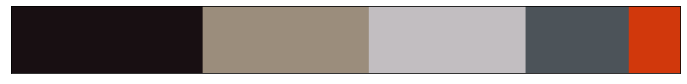

In [11]:
generateColours('C:/Users/Asus/Documents/SMU/Y4S2 (Y4S1)/(2) IS434 SA/Project/unsprung200/2017-03-22_16-21-09_UTC_2.jpg')

<b> Get colours for each image (Unsprung)</b>
* Mostly images of the bikes against a backdrop - bright, high contrast colours indicate that part of the bike is in the picture, and is usually the focus of the image
* Pictures with a large proportion of white is usually an image of a bike part

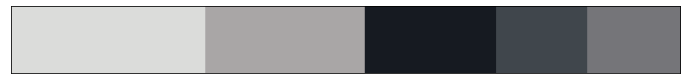

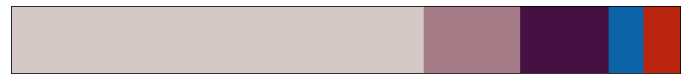

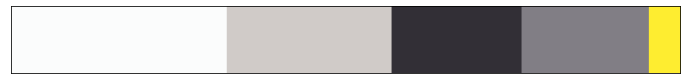

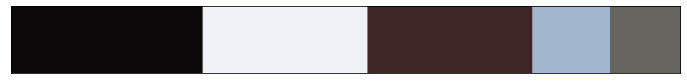

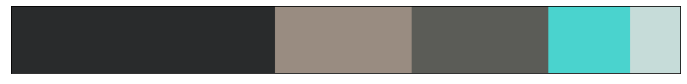

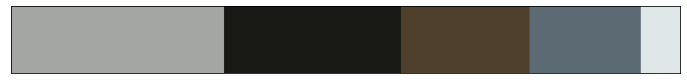

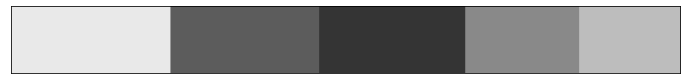

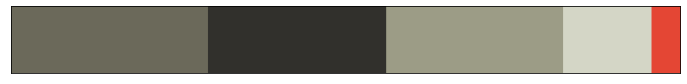

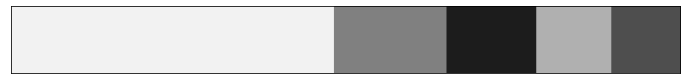

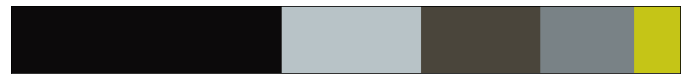

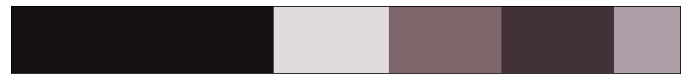

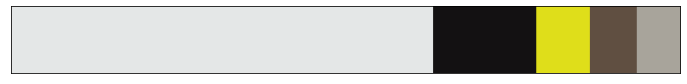

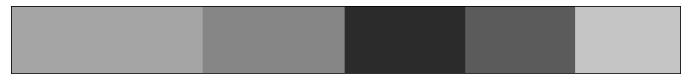

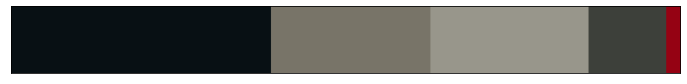

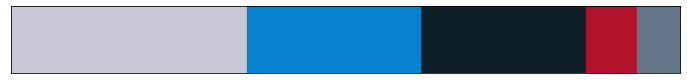

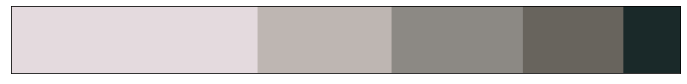

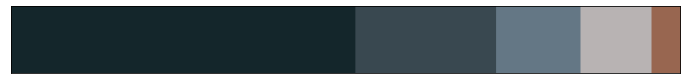

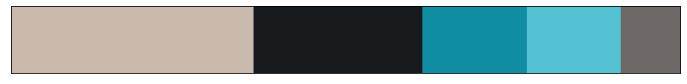

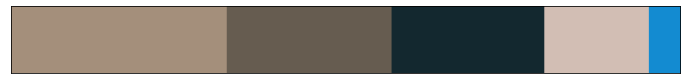

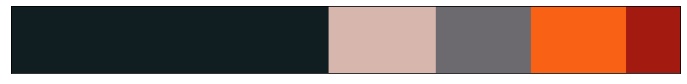

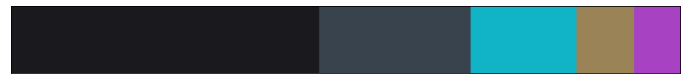

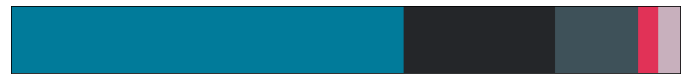

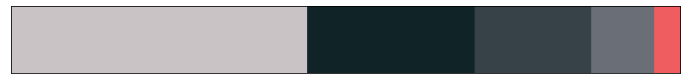

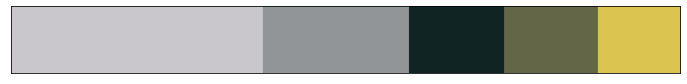

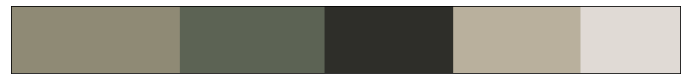

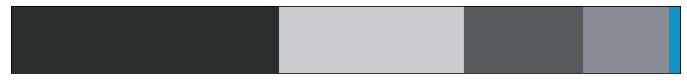

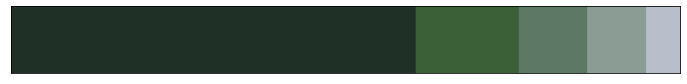

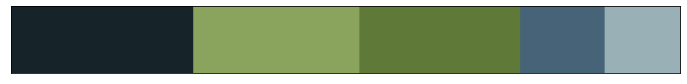

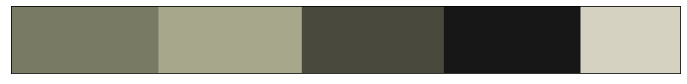

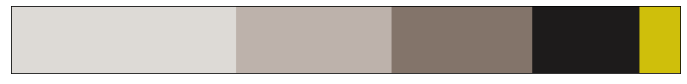

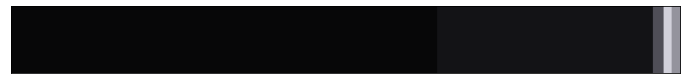

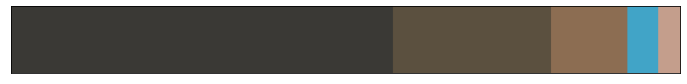

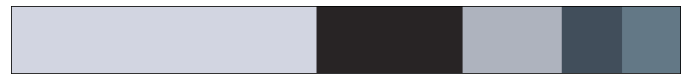

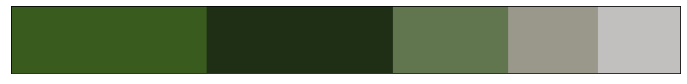

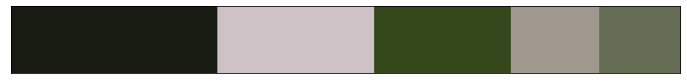

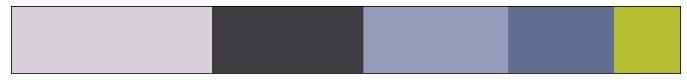

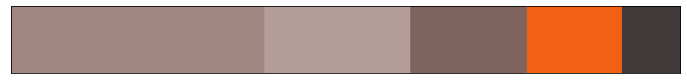

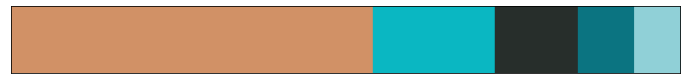

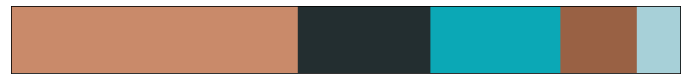

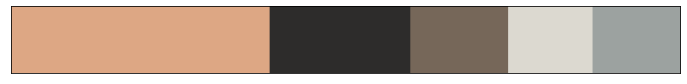

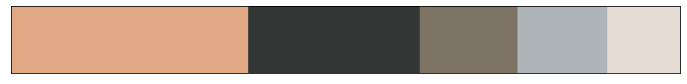

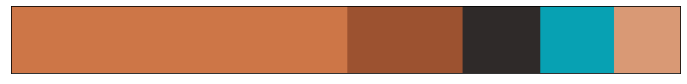

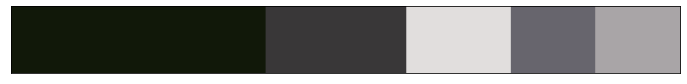

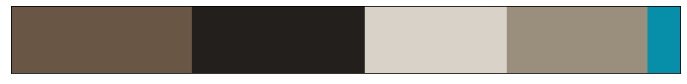

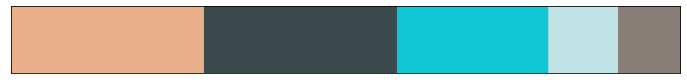

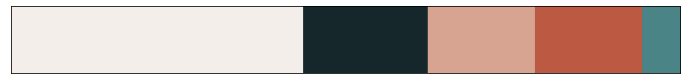

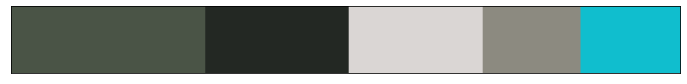

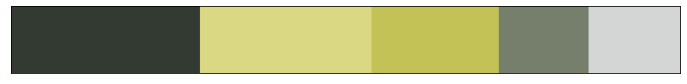

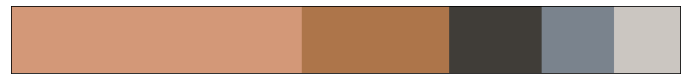

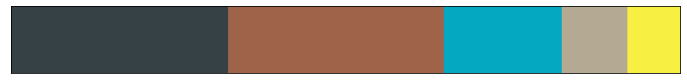

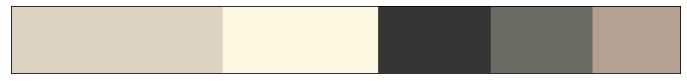

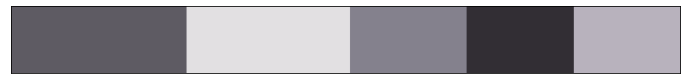

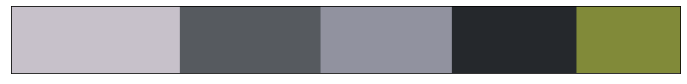

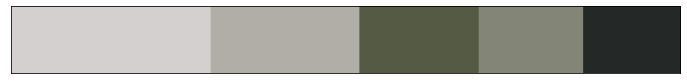

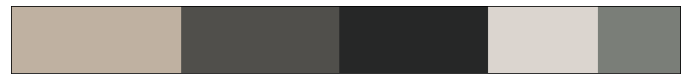

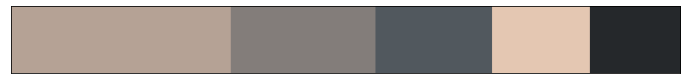

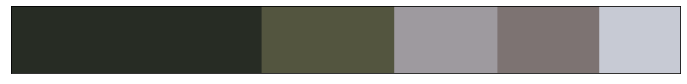

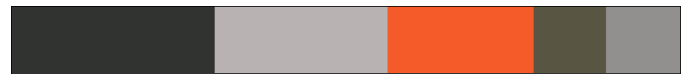

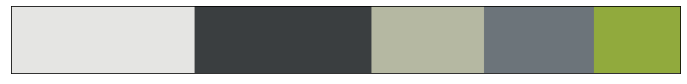

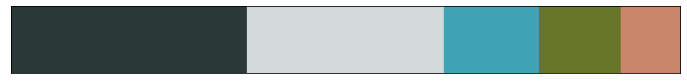

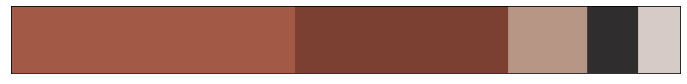

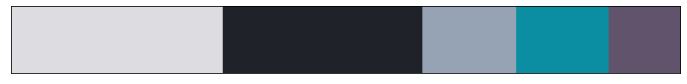

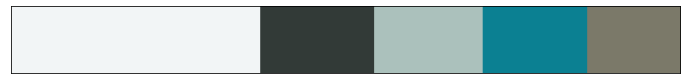

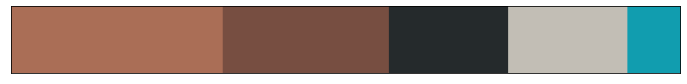

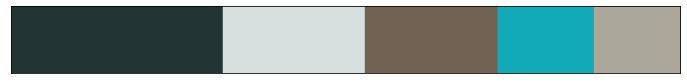

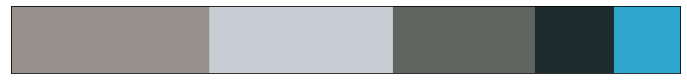

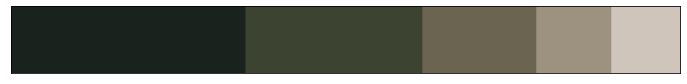

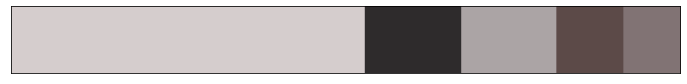

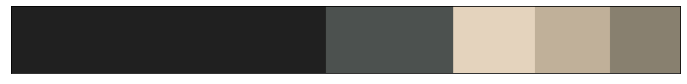

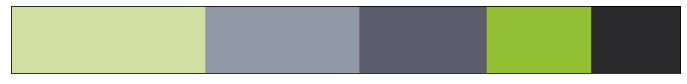

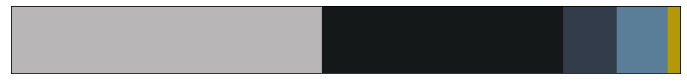

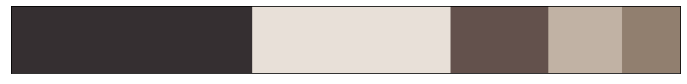

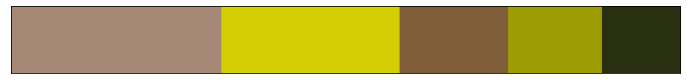

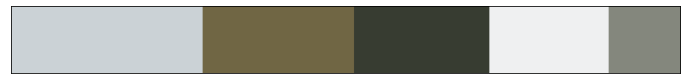

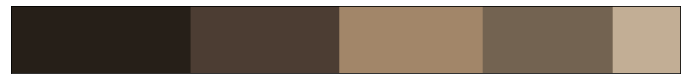

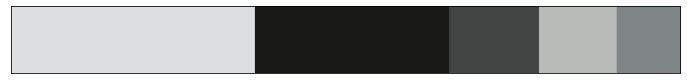

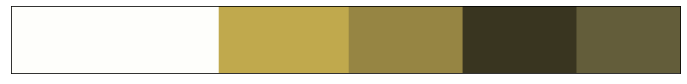

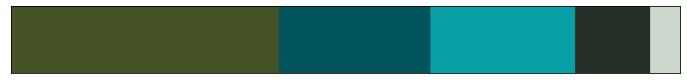

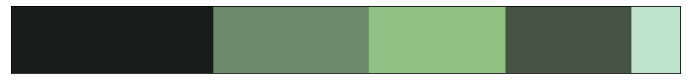

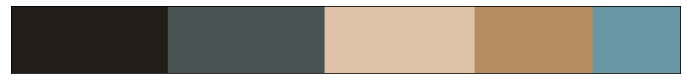

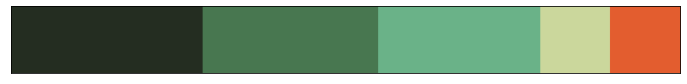

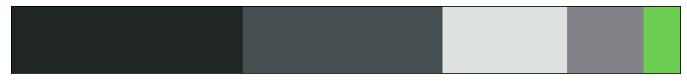

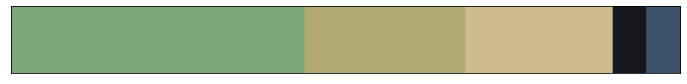

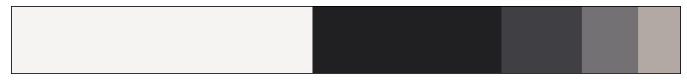

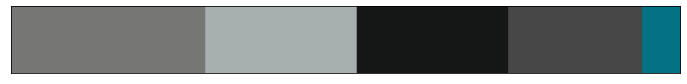

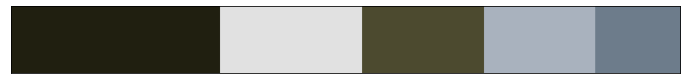

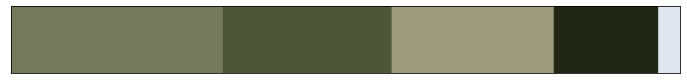

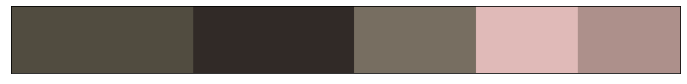

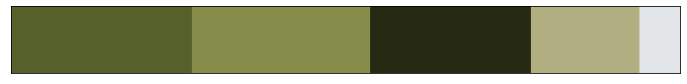

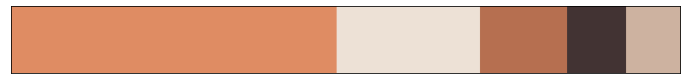

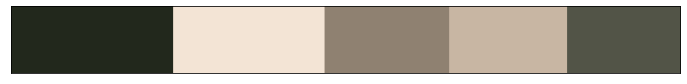

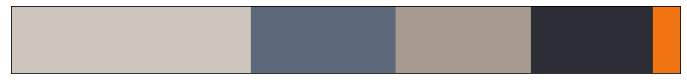

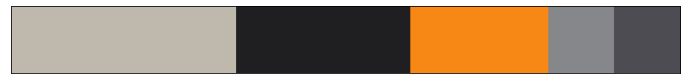

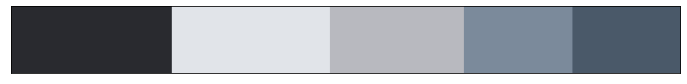

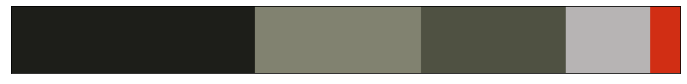

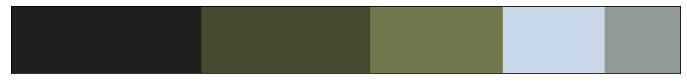

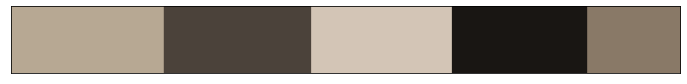

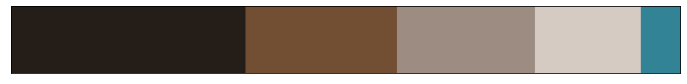

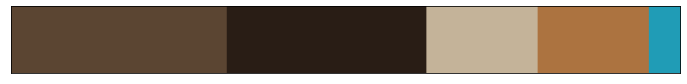

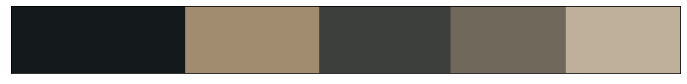

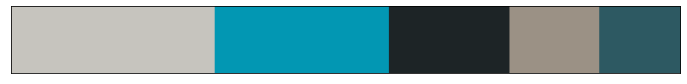

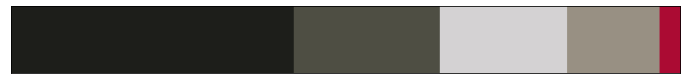

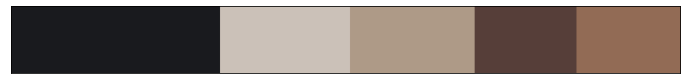

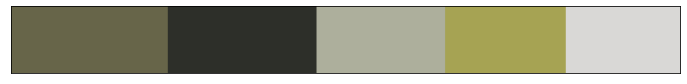

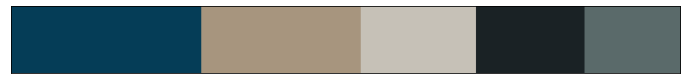

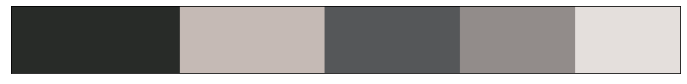

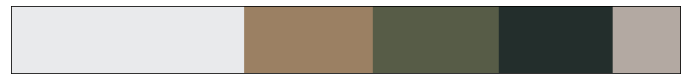

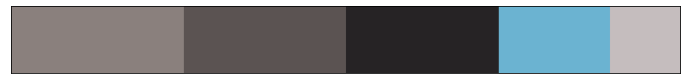

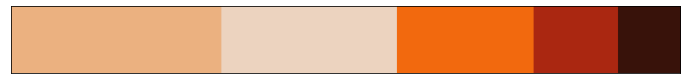

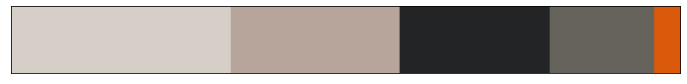

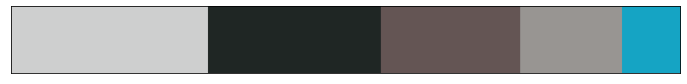

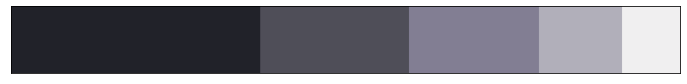

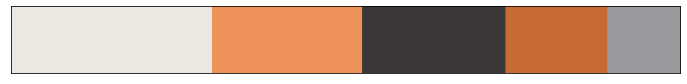

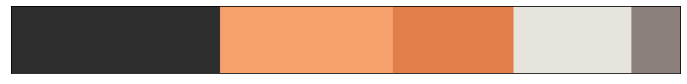

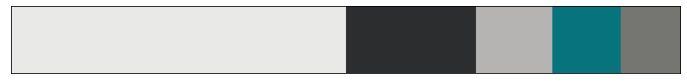

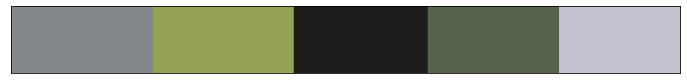

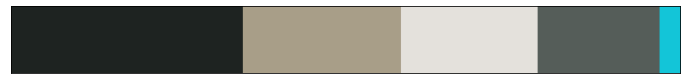

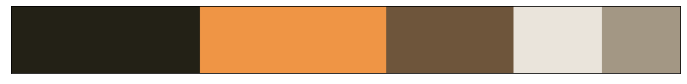

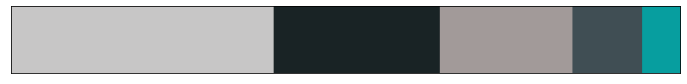

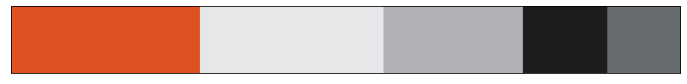

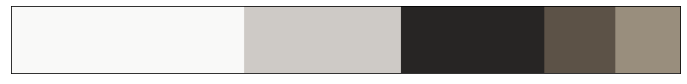

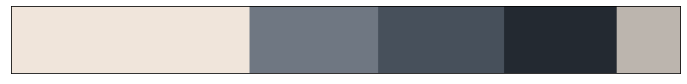

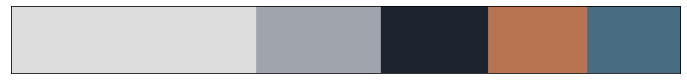

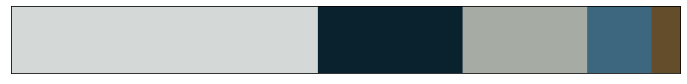

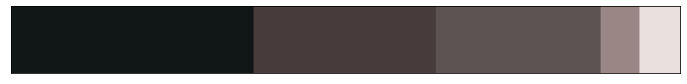

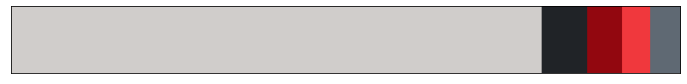

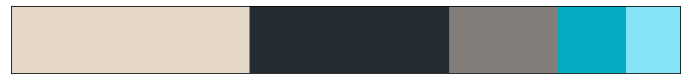

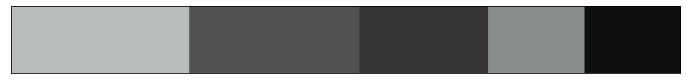

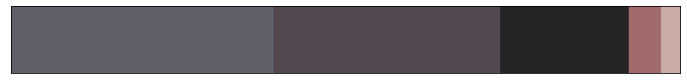

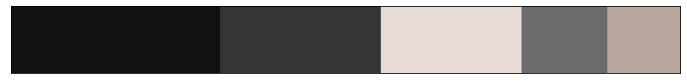

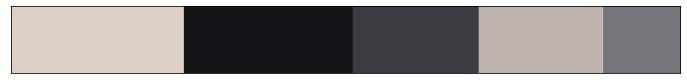

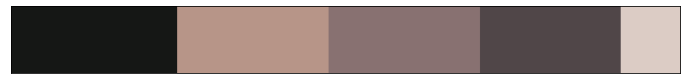

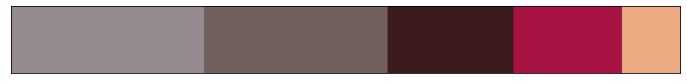

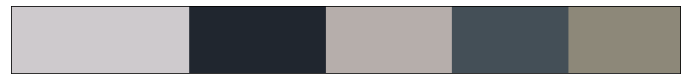

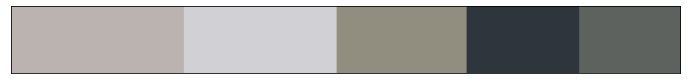

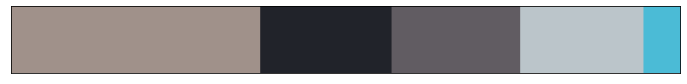

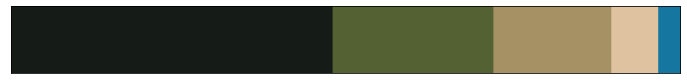

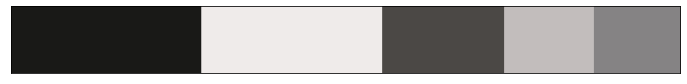

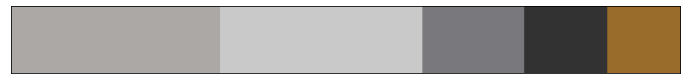

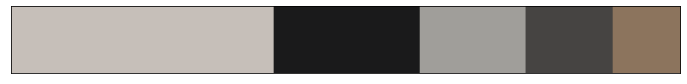

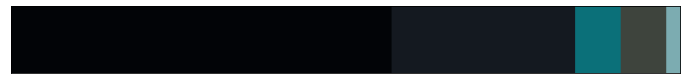

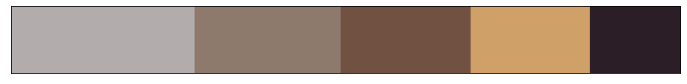

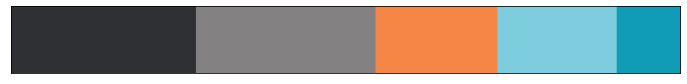

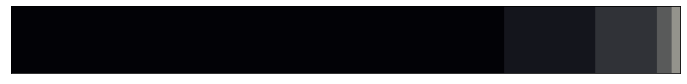

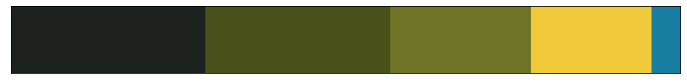

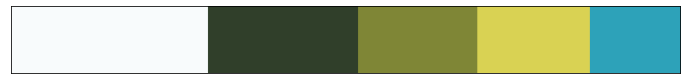

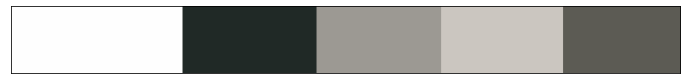

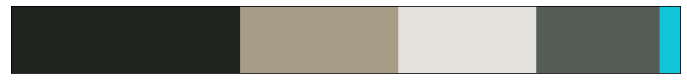

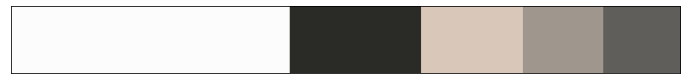

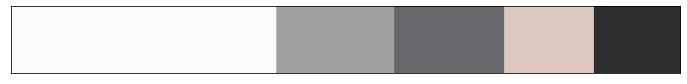

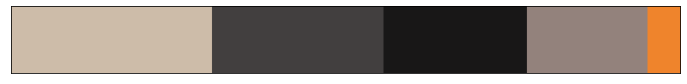

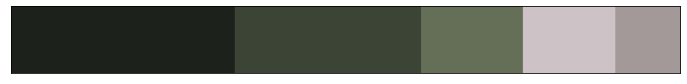

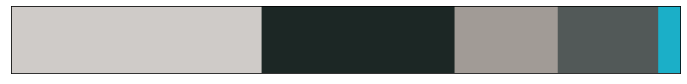

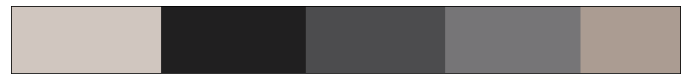

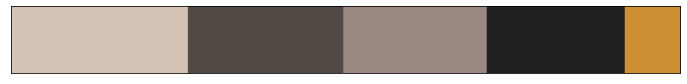

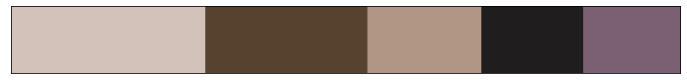

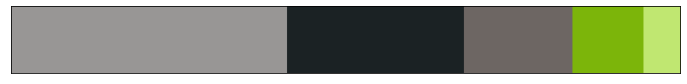

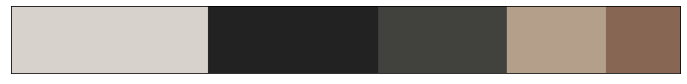

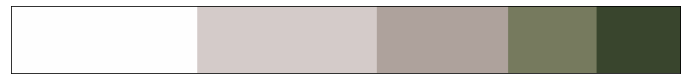

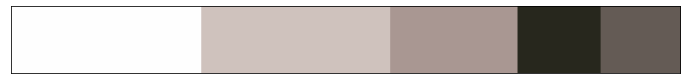

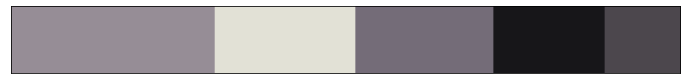

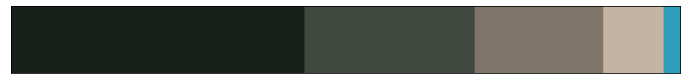

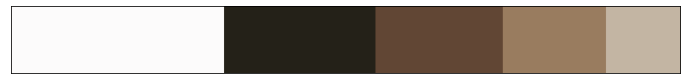

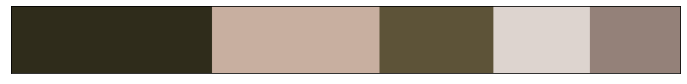

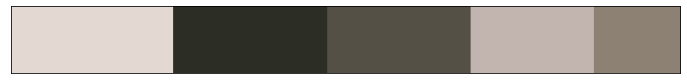

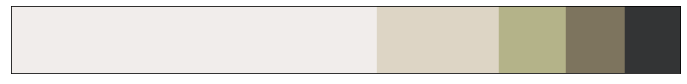

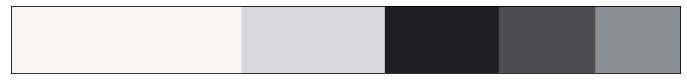

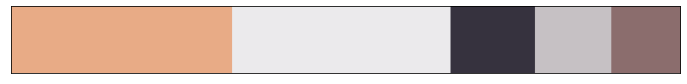

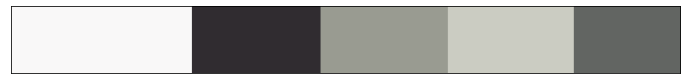

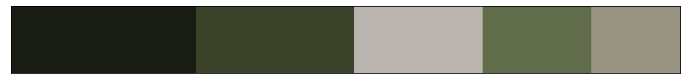

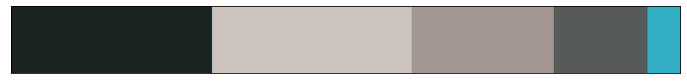

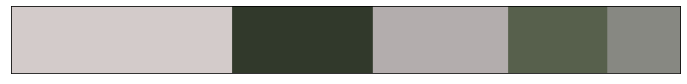

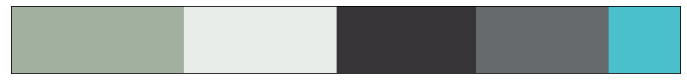

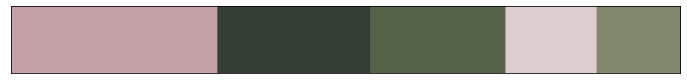

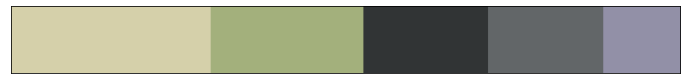

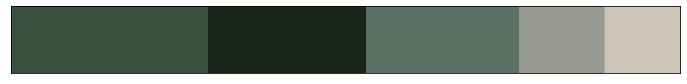

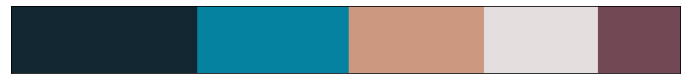

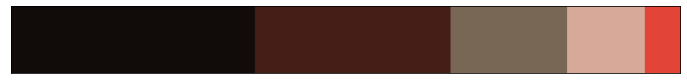

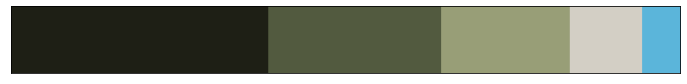

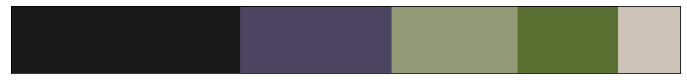

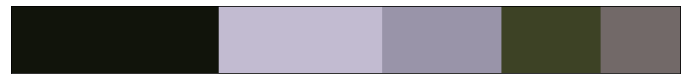

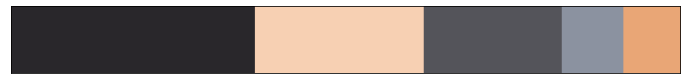

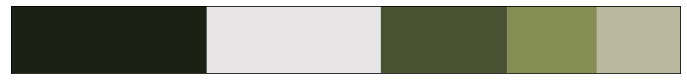

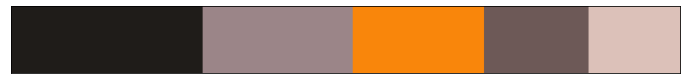

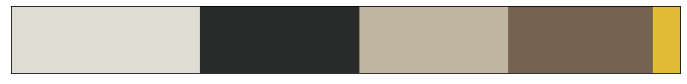

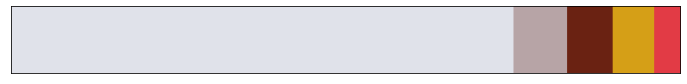

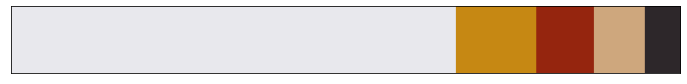

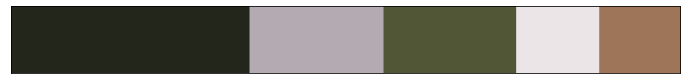

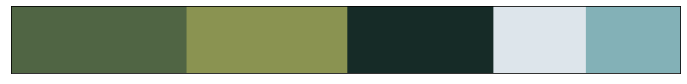

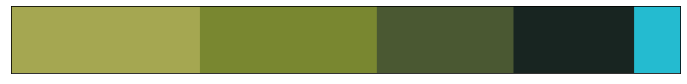

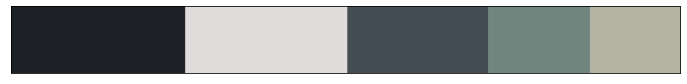

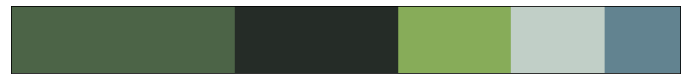

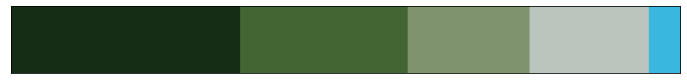

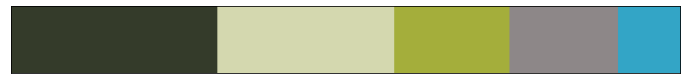

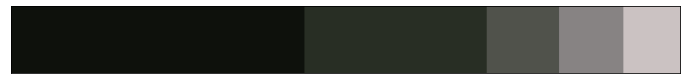

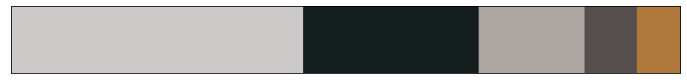

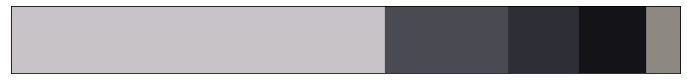

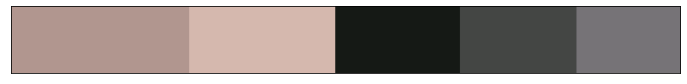

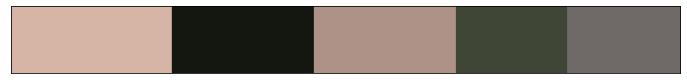

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [20]:
path_of_the_directory= 'C:/Users/Asus/Documents/SMU/Y4S2 (Y4S1)/(2) IS434 SA/Project/unsprung200/'
for filename in os.listdir(path_of_the_directory):
    f = os.path.join(filename)
    with open(path_of_the_directory + filename, "r") as json_file:
        path_to_image = path_of_the_directory + filename
        generateColours(path_to_image)

<b> Get colours for each image (Yeti Cycles)</b>
* There are more scenic pictures - tones of brown/beige (sunset/soil), light blue (sky/mountain), greens (foresty areas)
* Pictures with a large proportion of white is usually a picture of the bike / bike part against a white bakground
* High contrast colours (blue, orange, purple) are usually part of the bike

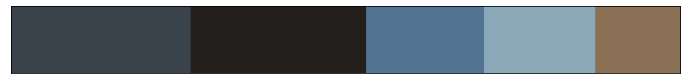

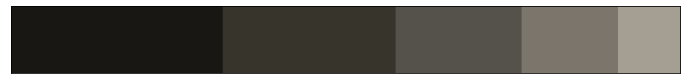

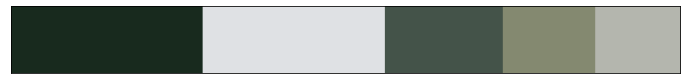

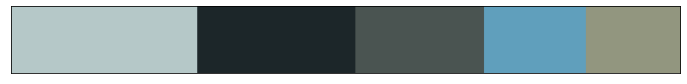

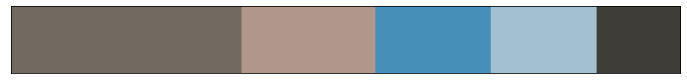

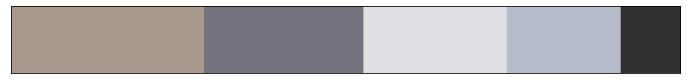

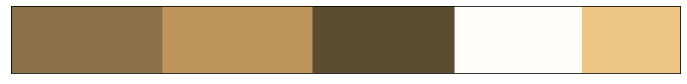

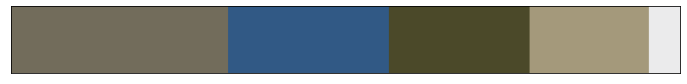

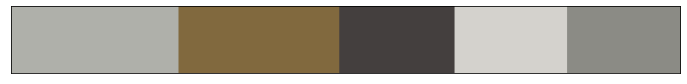

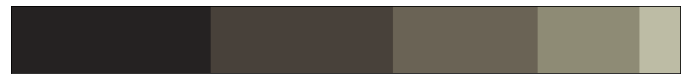

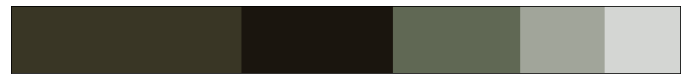

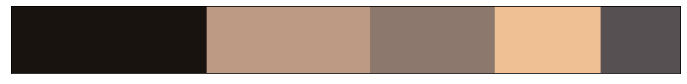

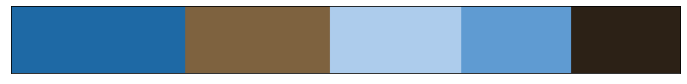

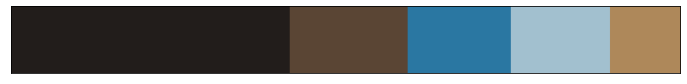

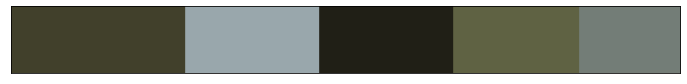

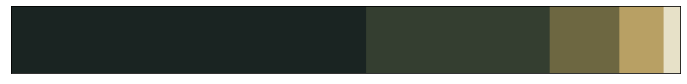

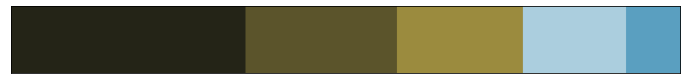

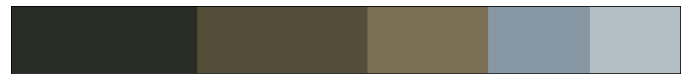

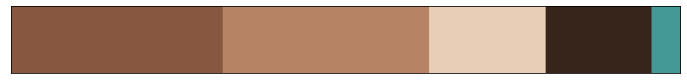

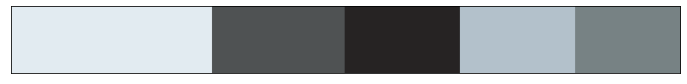

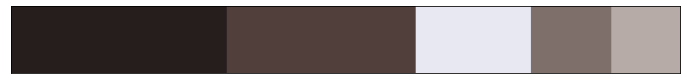

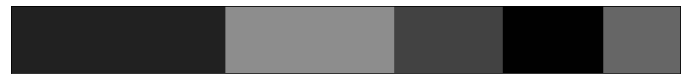

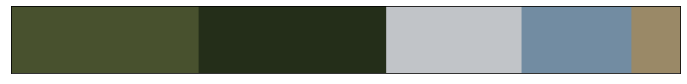

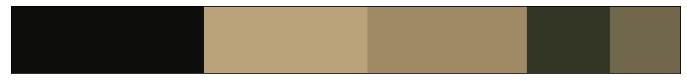

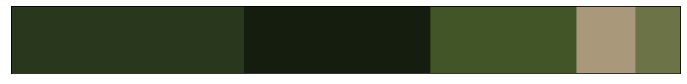

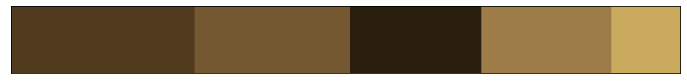

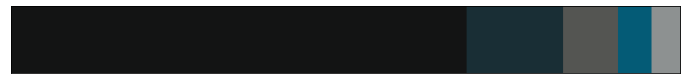

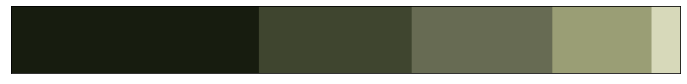

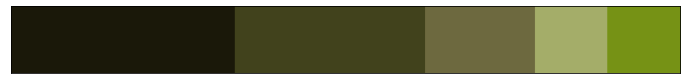

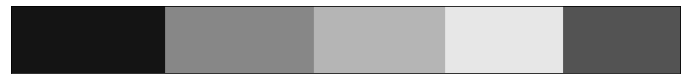

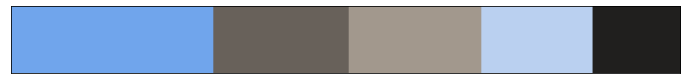

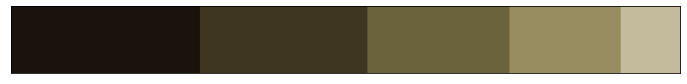

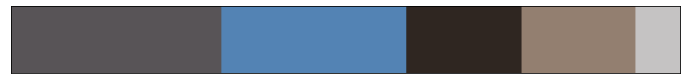

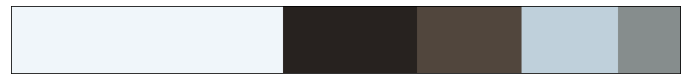

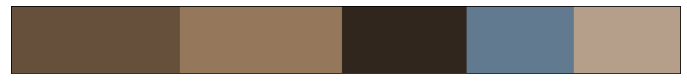

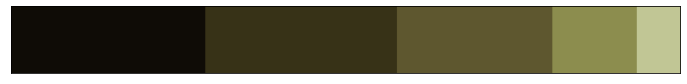

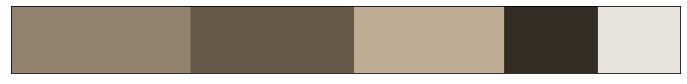

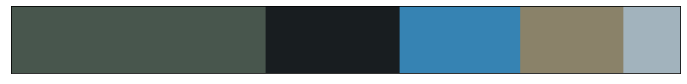

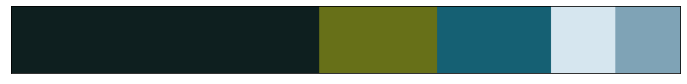

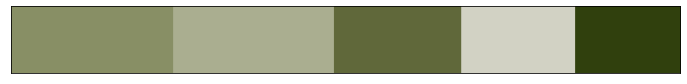

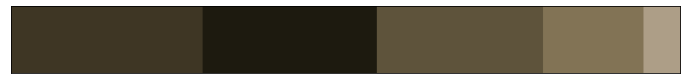

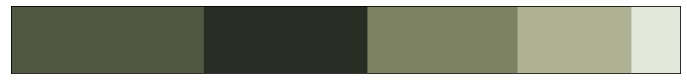

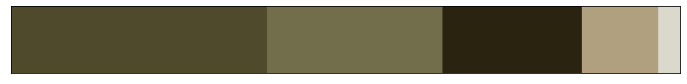

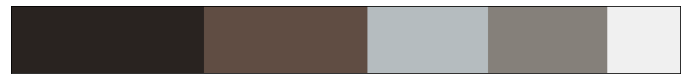

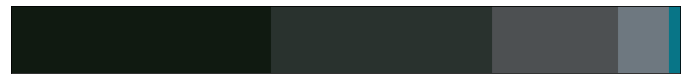

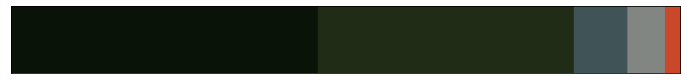

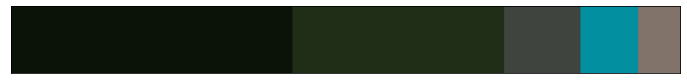

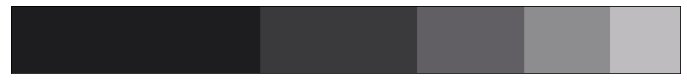

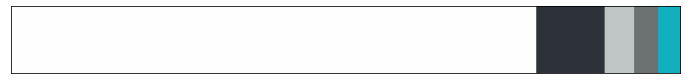

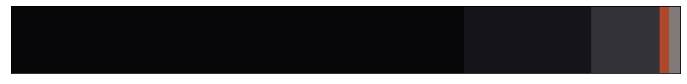

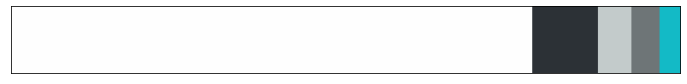

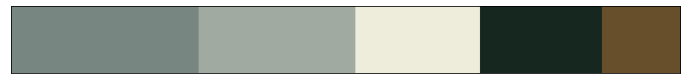

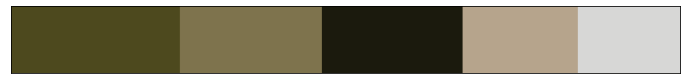

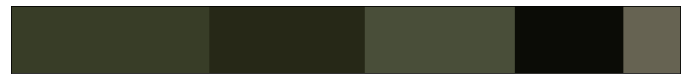

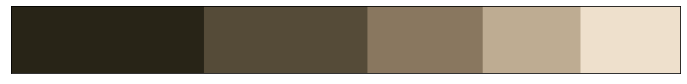

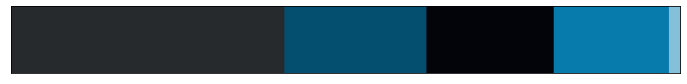

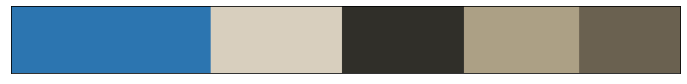

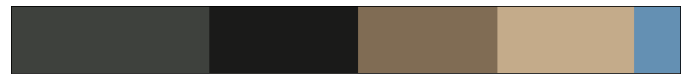

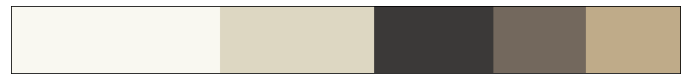

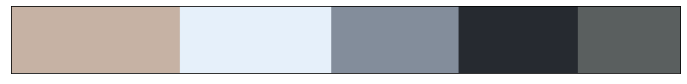

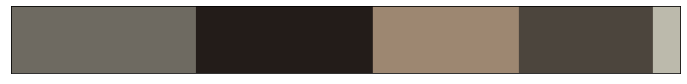

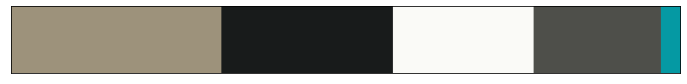

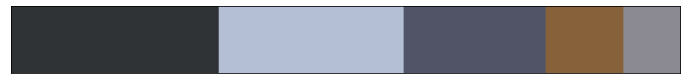

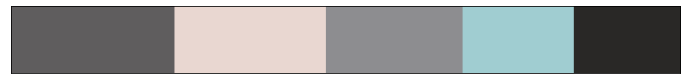

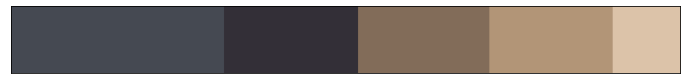

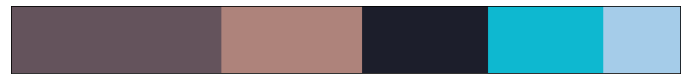

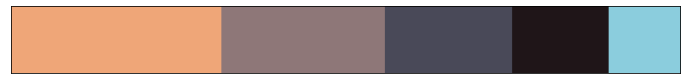

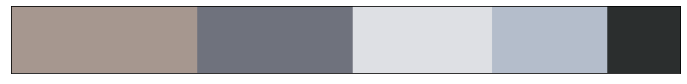

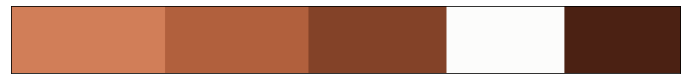

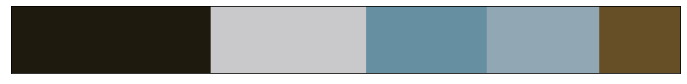

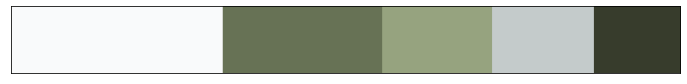

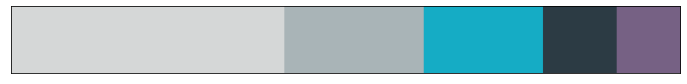

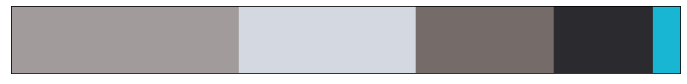

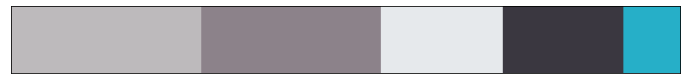

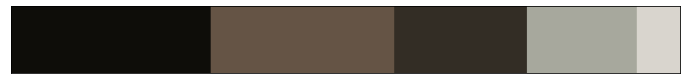

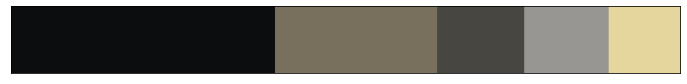

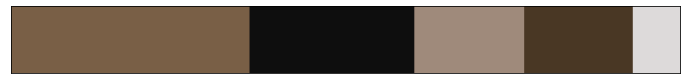

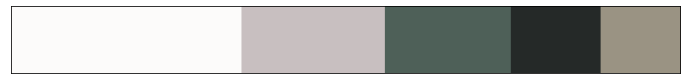

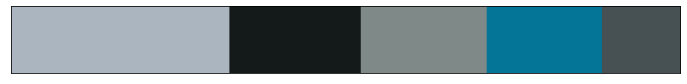

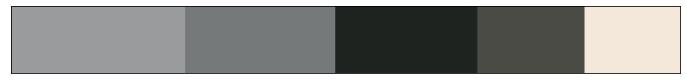

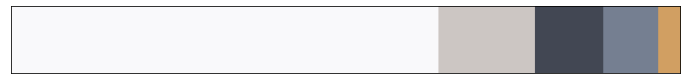

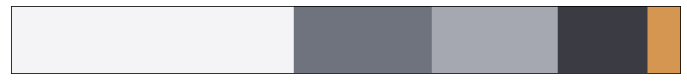

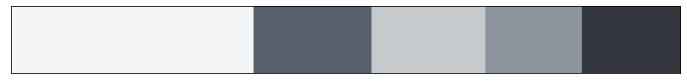

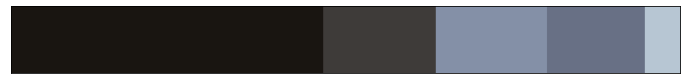

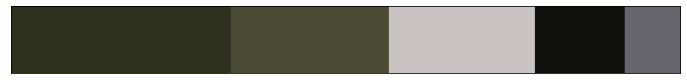

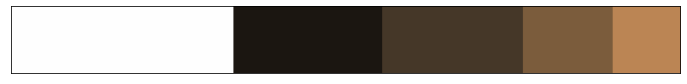

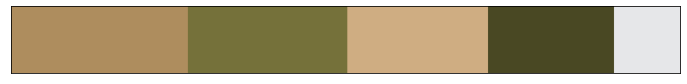

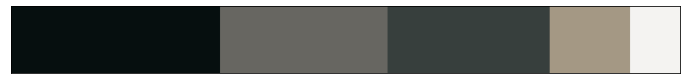

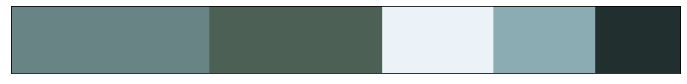

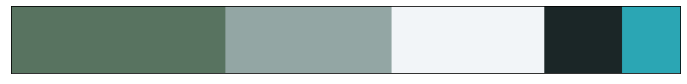

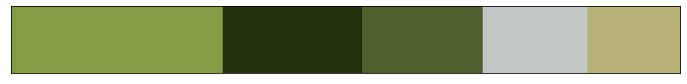

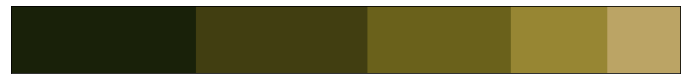

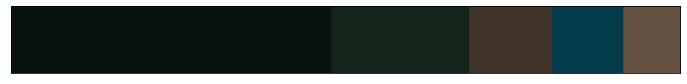

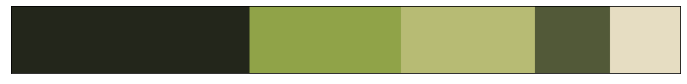

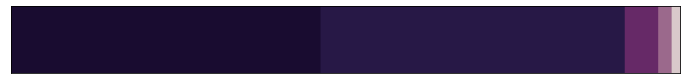

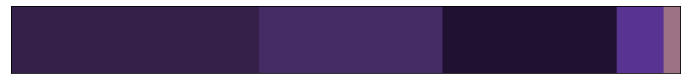

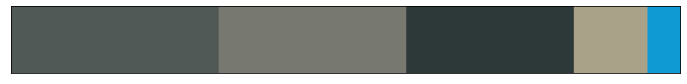

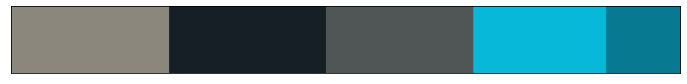

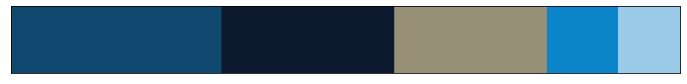

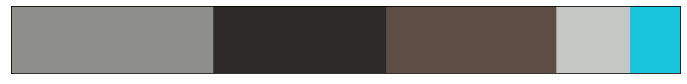

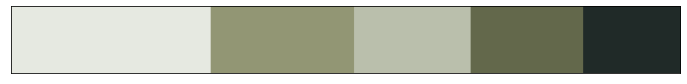

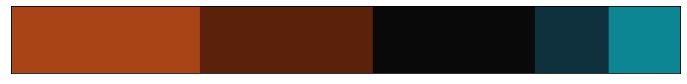

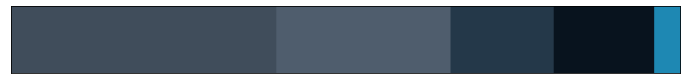

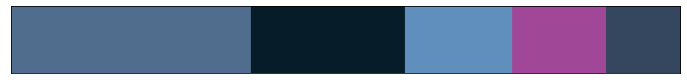

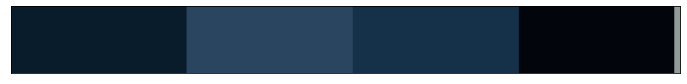

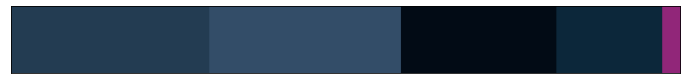

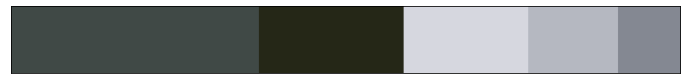

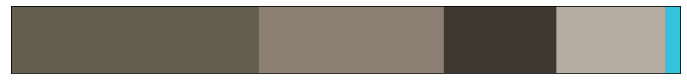

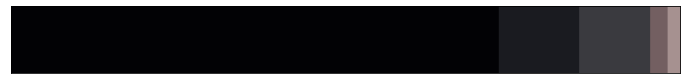

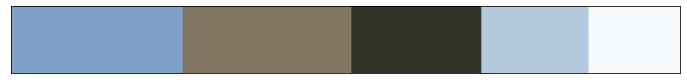

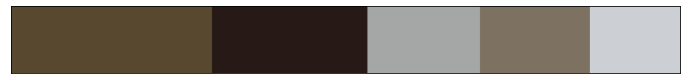

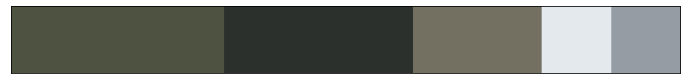

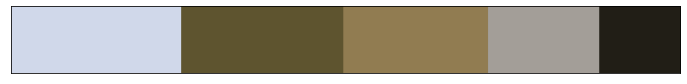

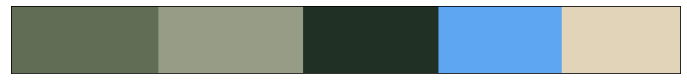

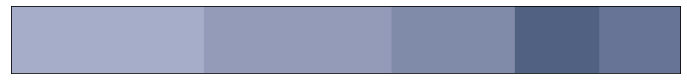

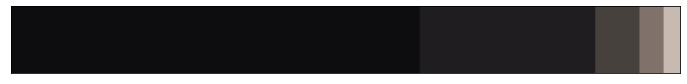

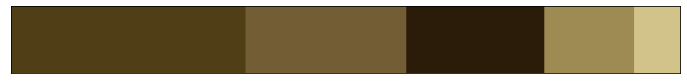

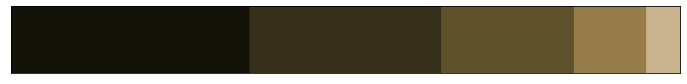

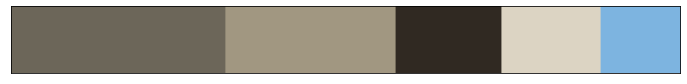

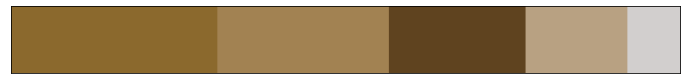

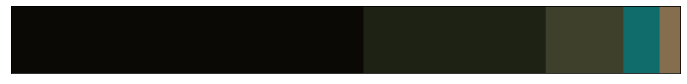

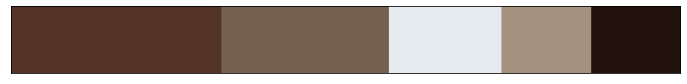

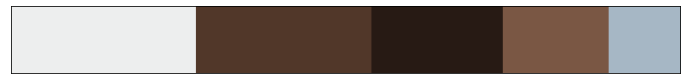

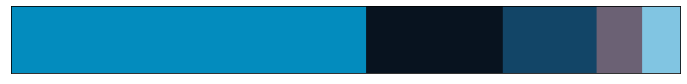

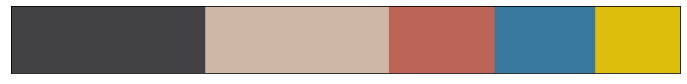

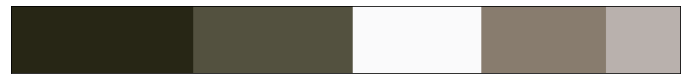

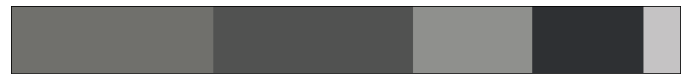

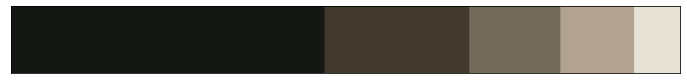

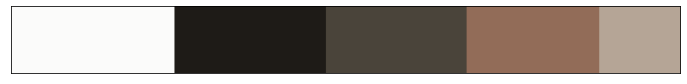

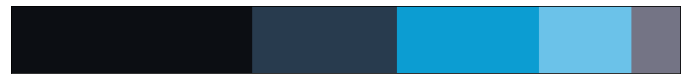

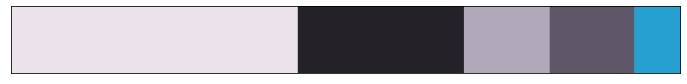

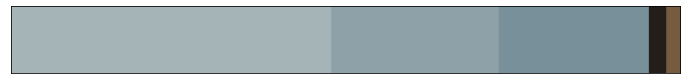

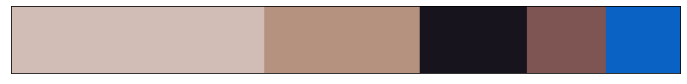

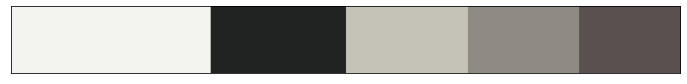

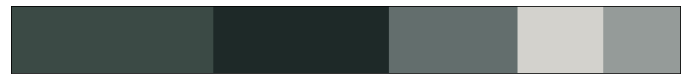

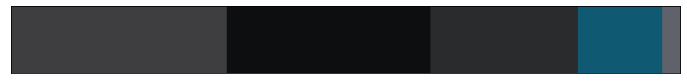

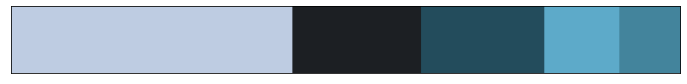

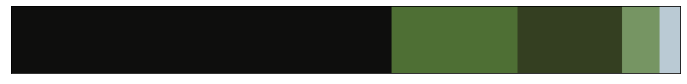

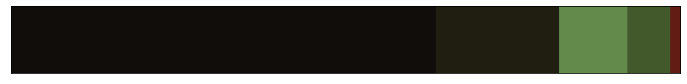

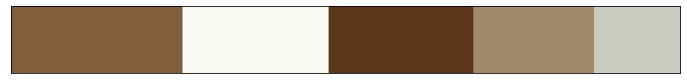

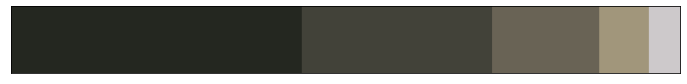

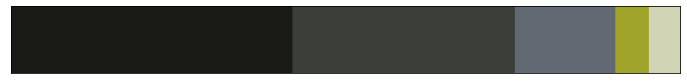

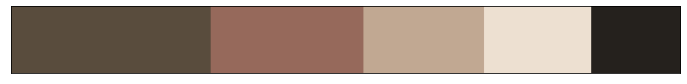

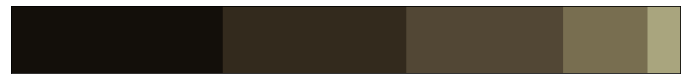

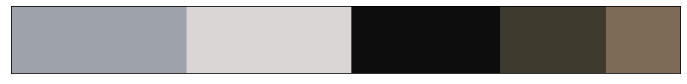

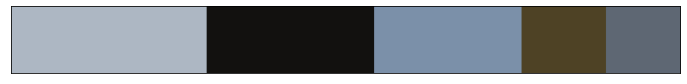

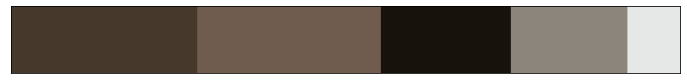

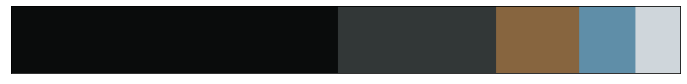

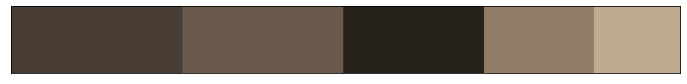

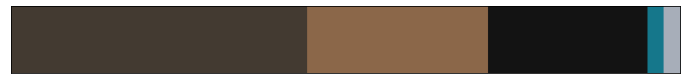

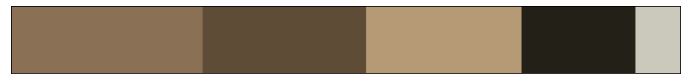

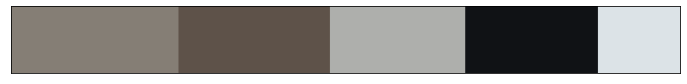

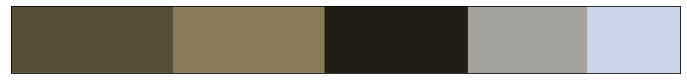

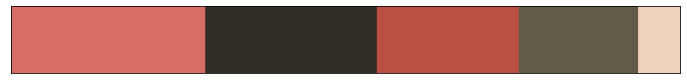

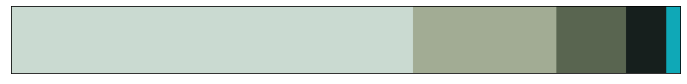

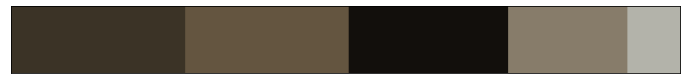

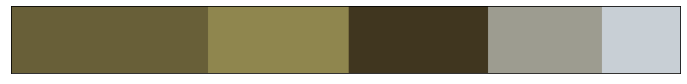

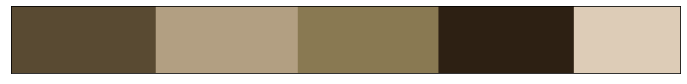

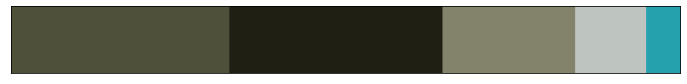

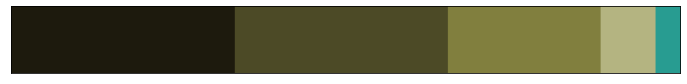

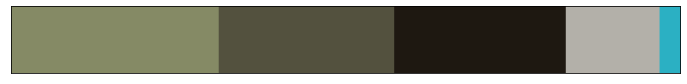

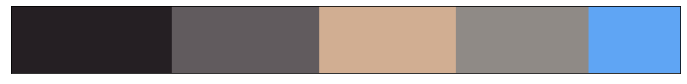

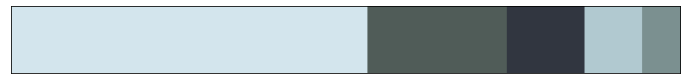

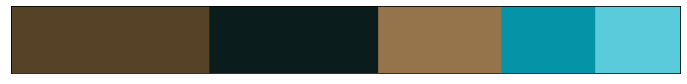

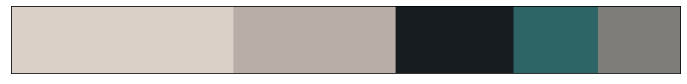

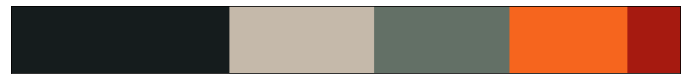

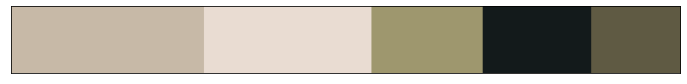

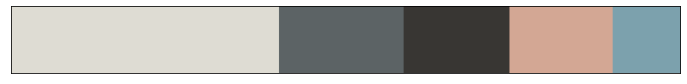

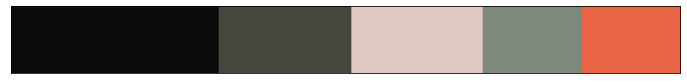

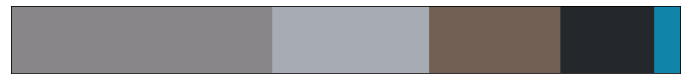

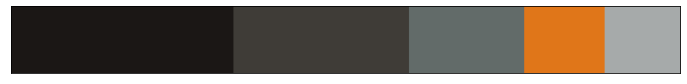

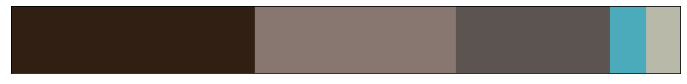

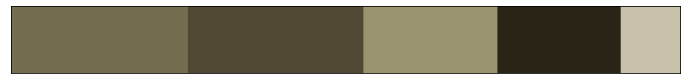

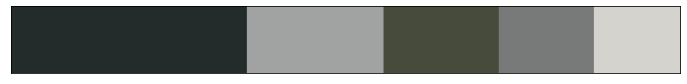

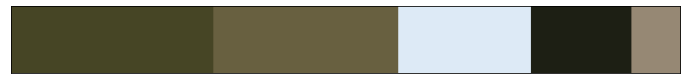

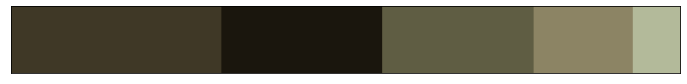

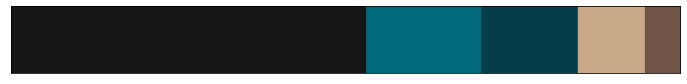

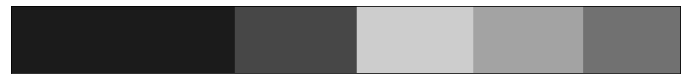

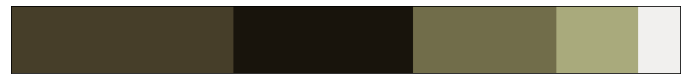

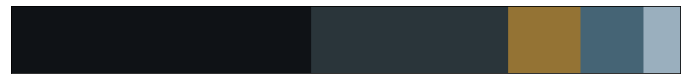

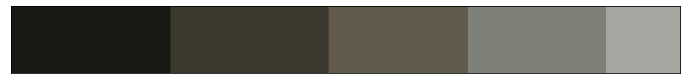

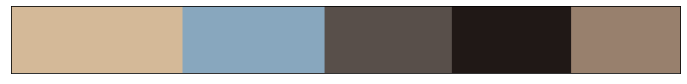

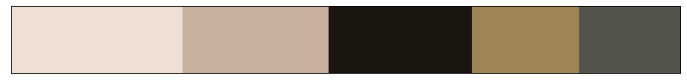

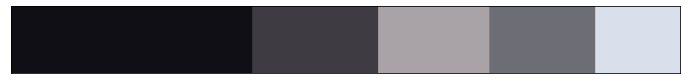

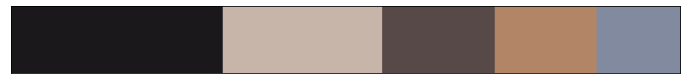

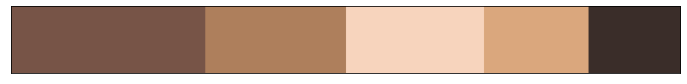

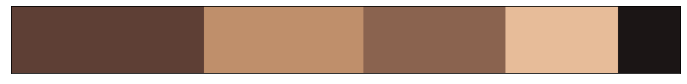

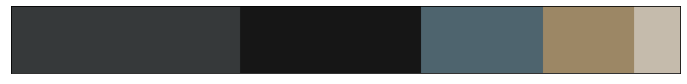

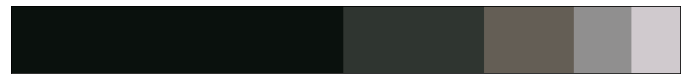

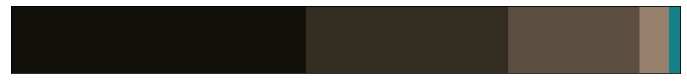

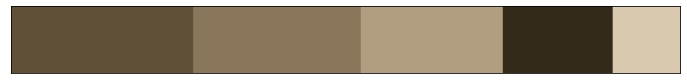

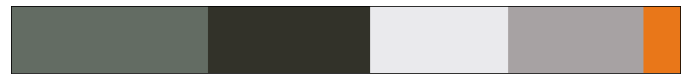

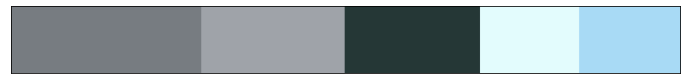

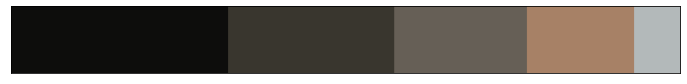

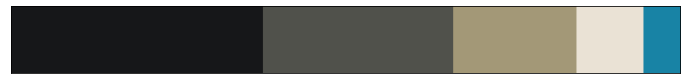

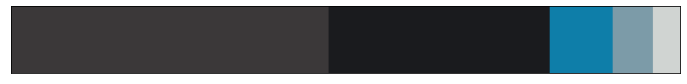

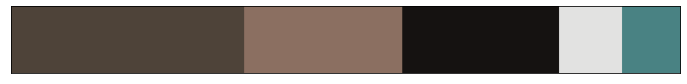

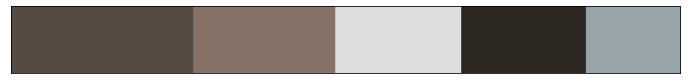

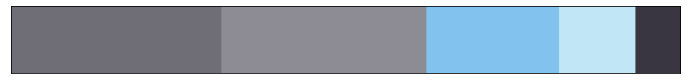

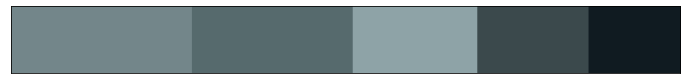

In [16]:
path_of_the_directory= 'C:/Users/Asus/Documents/SMU/Y4S2 (Y4S1)/(2) IS434 SA/Project/yeticycles200/'
for filename in os.listdir(path_of_the_directory):
    f = os.path.join(filename)
    with open(path_of_the_directory + filename, "r") as json_file:
        path_to_image = path_of_the_directory + filename
        generateColours(path_to_image)

<b> Get colours for each image (Santa Cruz)</b>
* Mostly images of bike parts - indicated by large proportions of white / black / grey tones
* High contrast colours (purple, pink, teal blue, yellow) are usually the bikes 

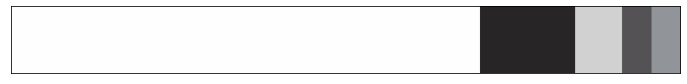

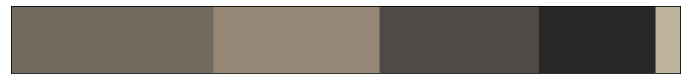

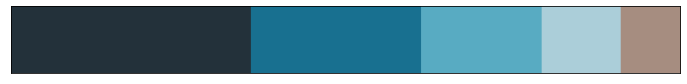

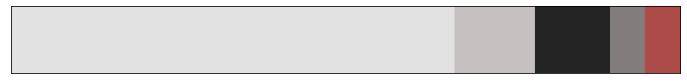

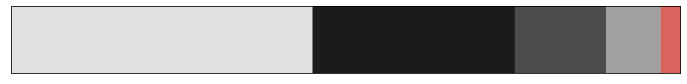

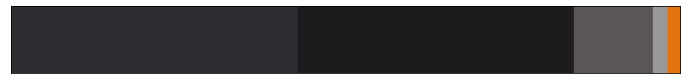

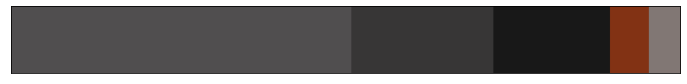

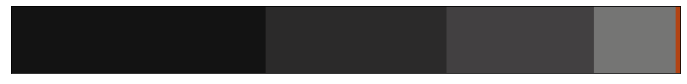

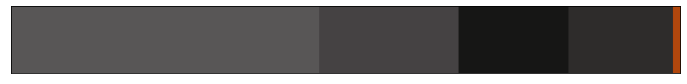

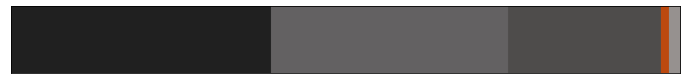

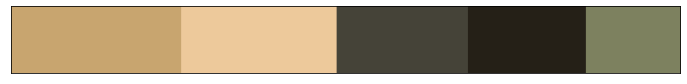

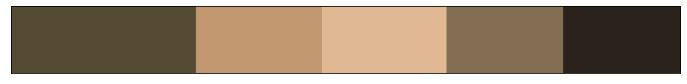

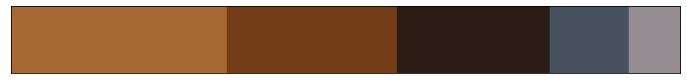

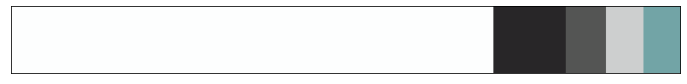

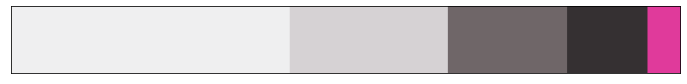

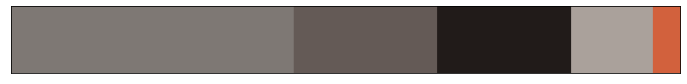

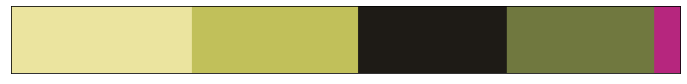

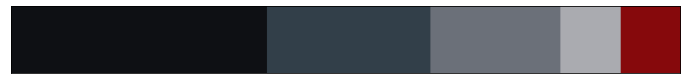

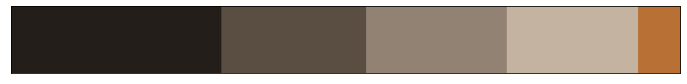

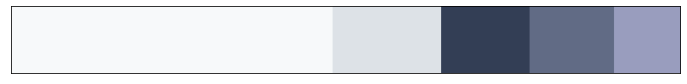

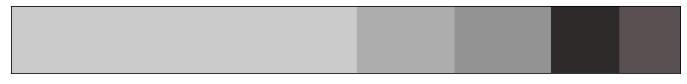

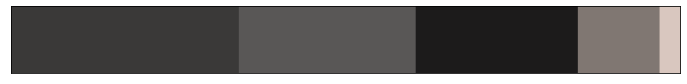

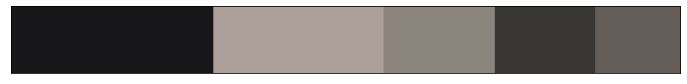

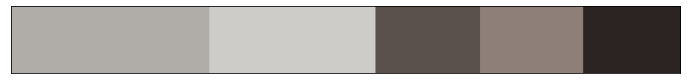

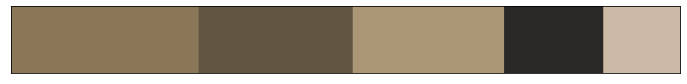

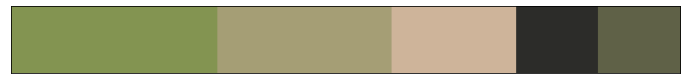

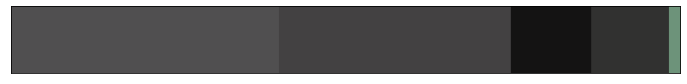

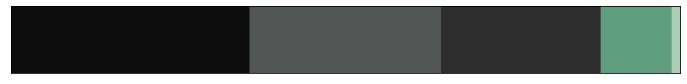

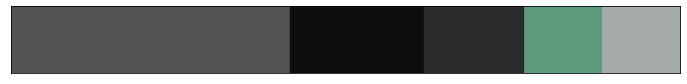

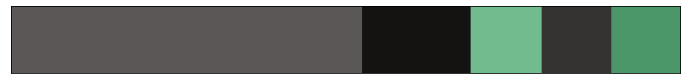

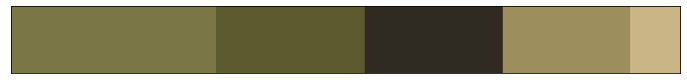

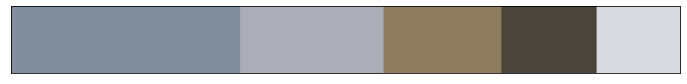

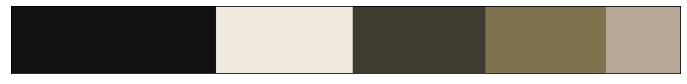

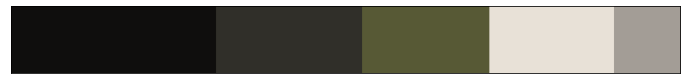

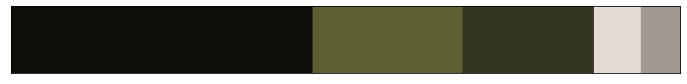

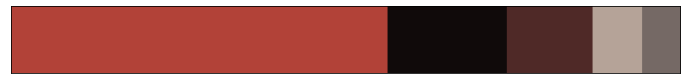

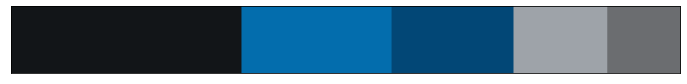

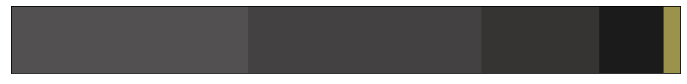

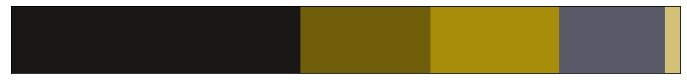

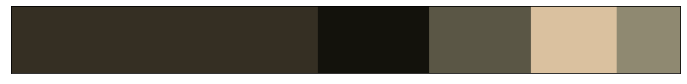

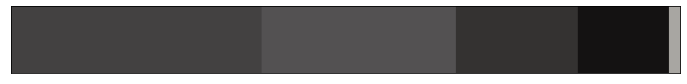

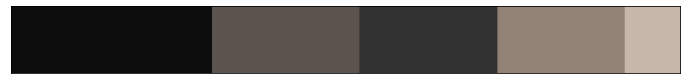

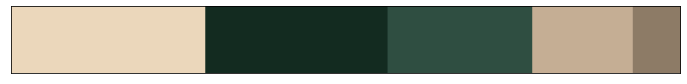

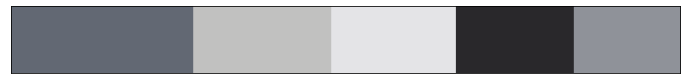

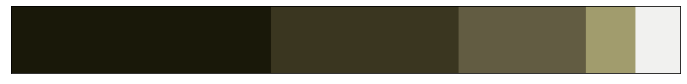

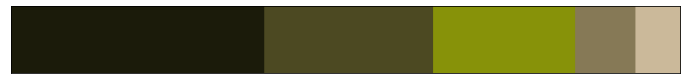

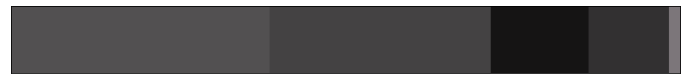

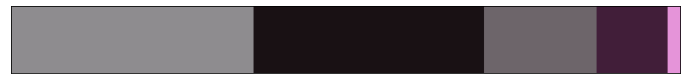

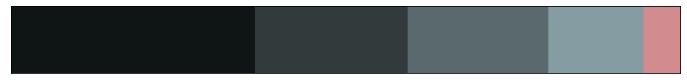

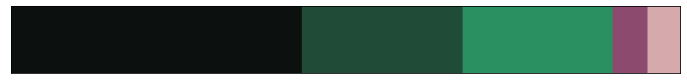

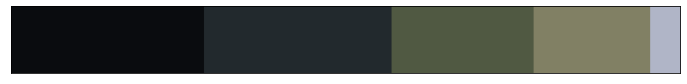

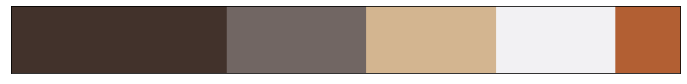

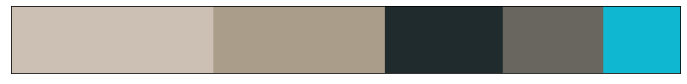

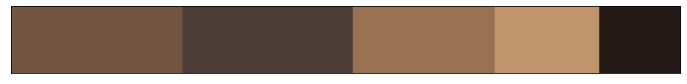

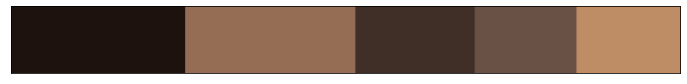

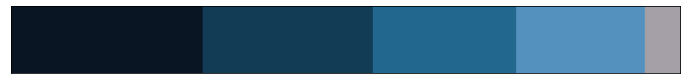

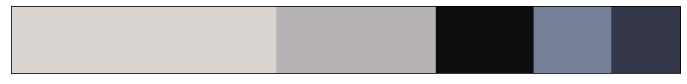

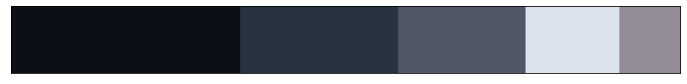

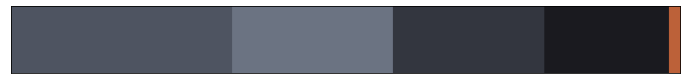

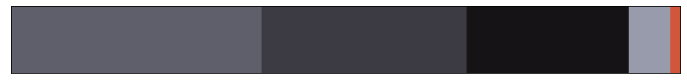

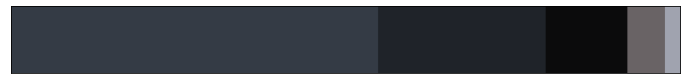

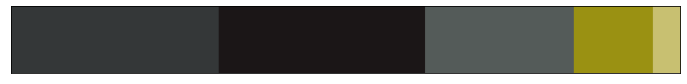

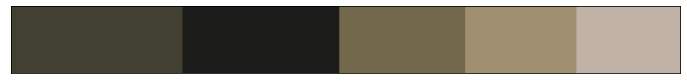

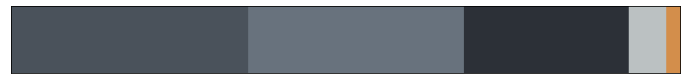

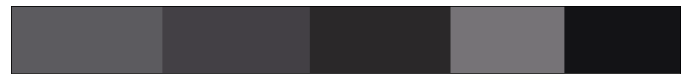

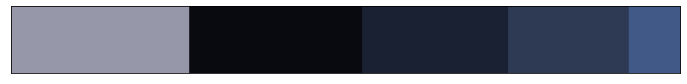

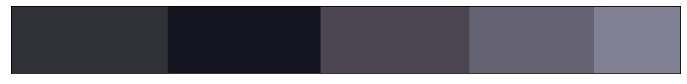

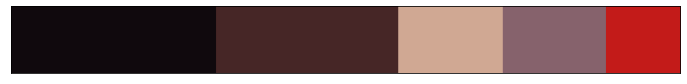

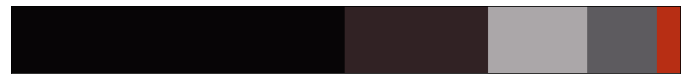

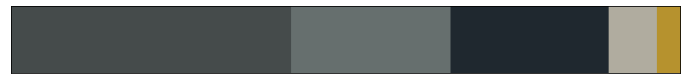

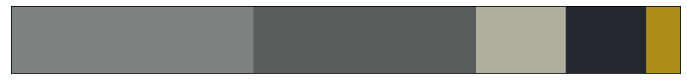

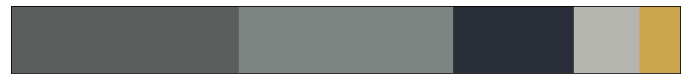

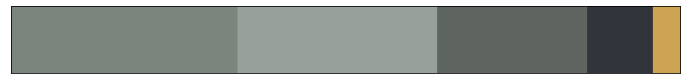

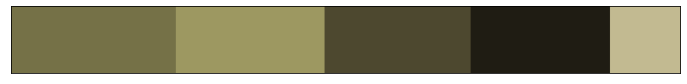

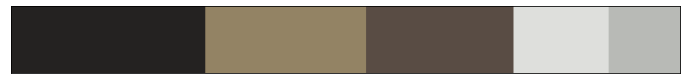

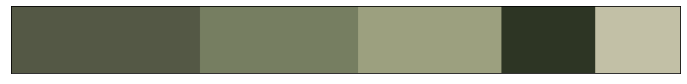

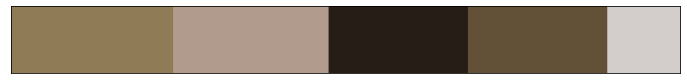

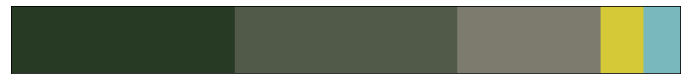

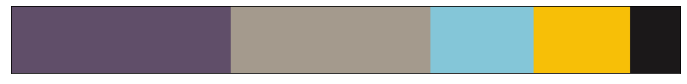

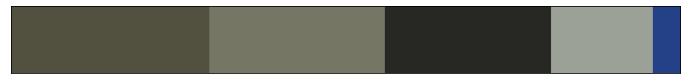

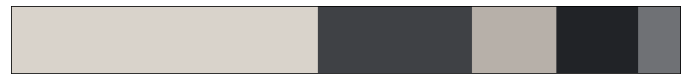

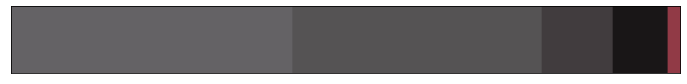

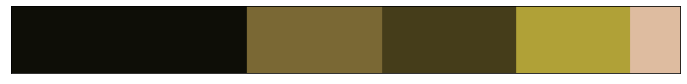

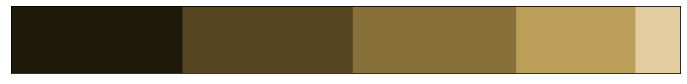

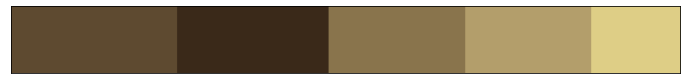

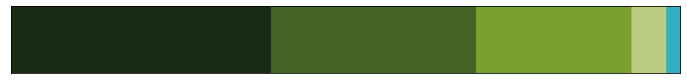

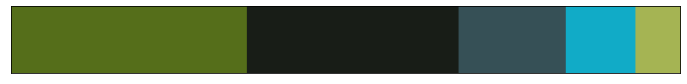

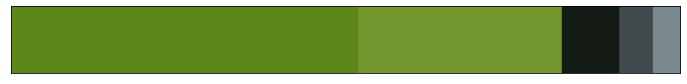

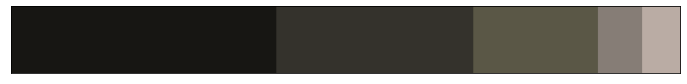

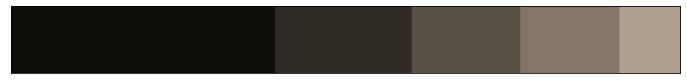

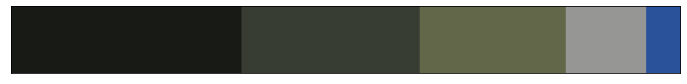

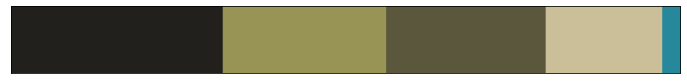

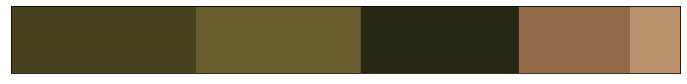

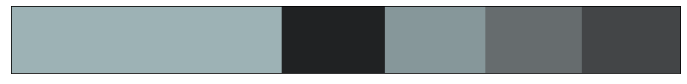

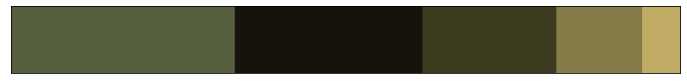

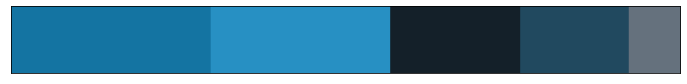

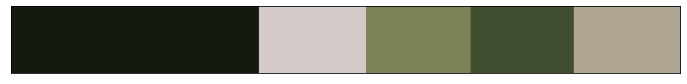

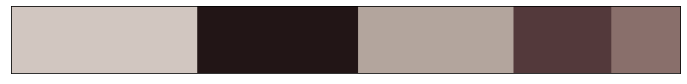

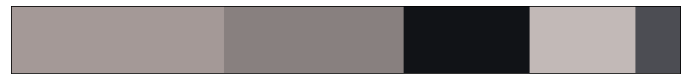

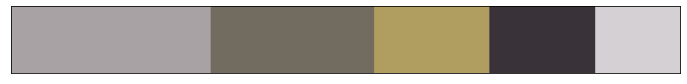

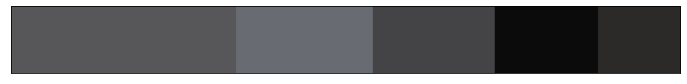

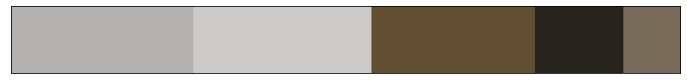

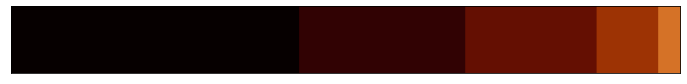

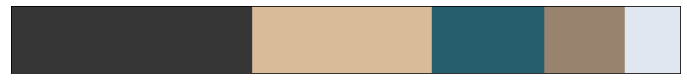

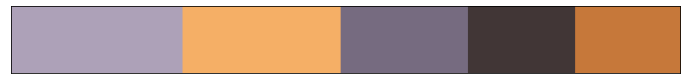

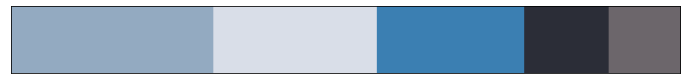

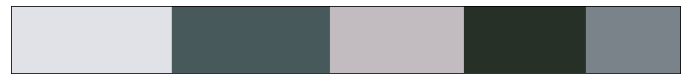

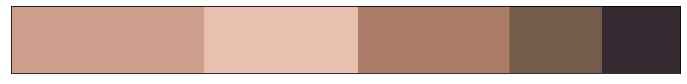

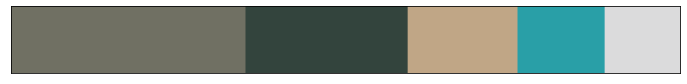

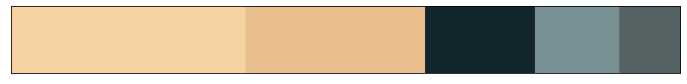

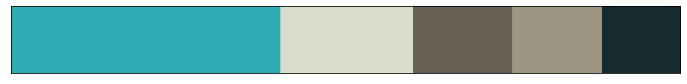

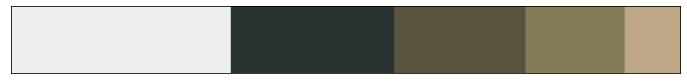

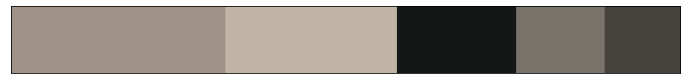

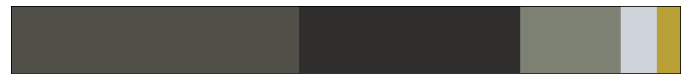

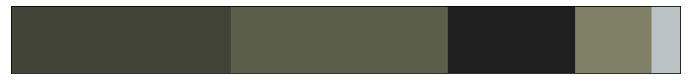

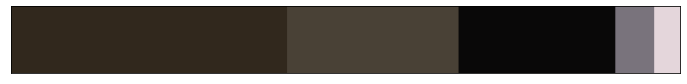

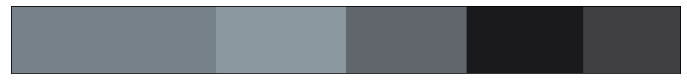

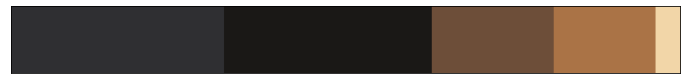

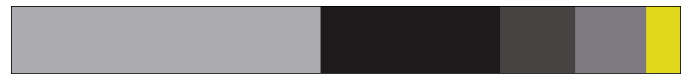

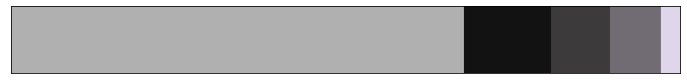

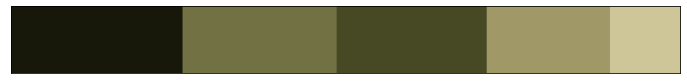

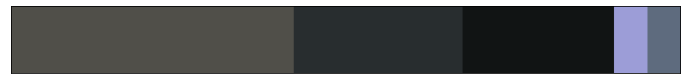

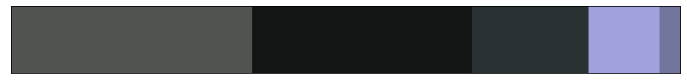

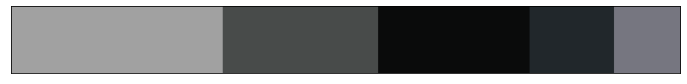

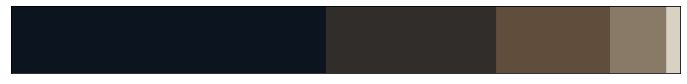

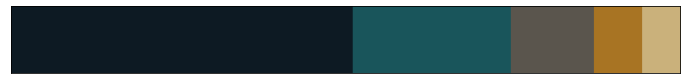

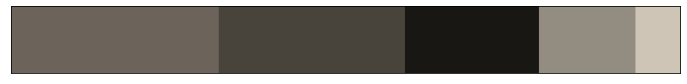

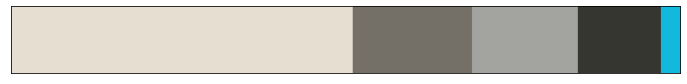

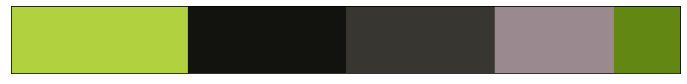

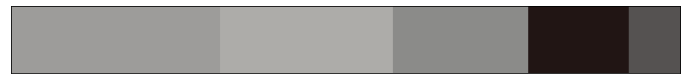

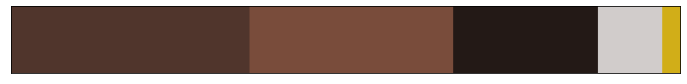

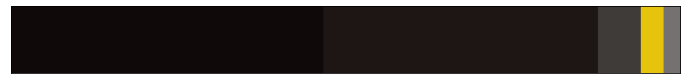

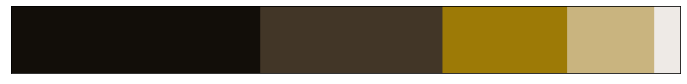

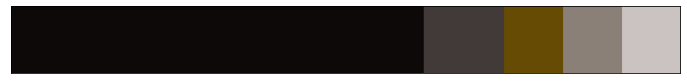

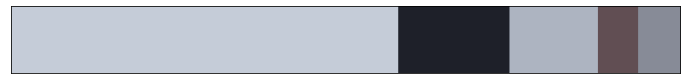

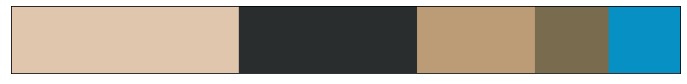

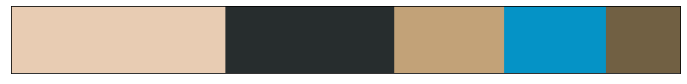

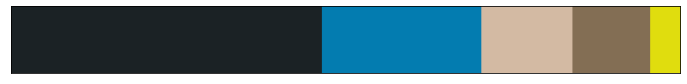

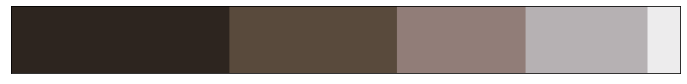

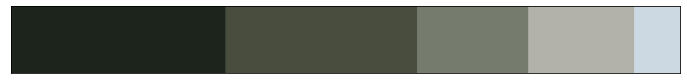

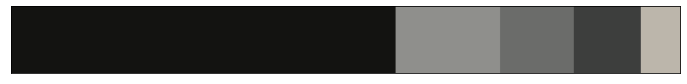

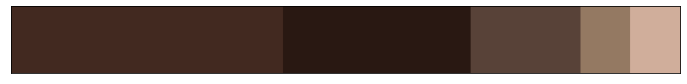

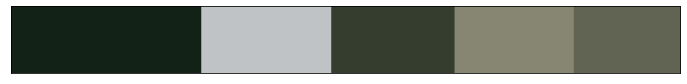

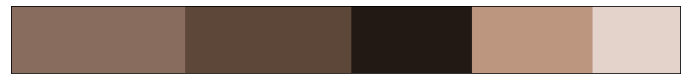

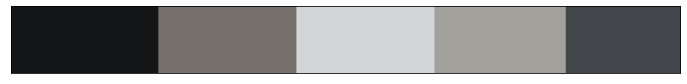

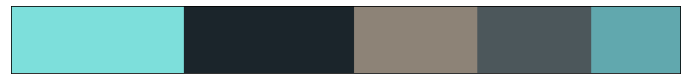

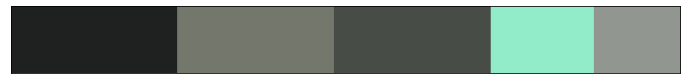

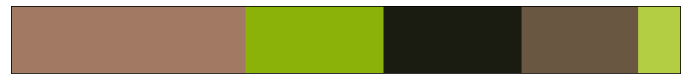

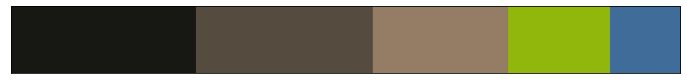

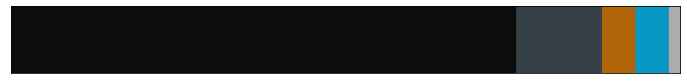

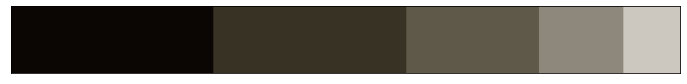

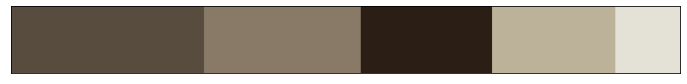

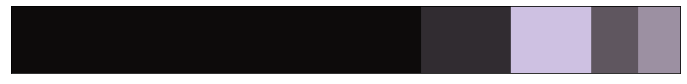

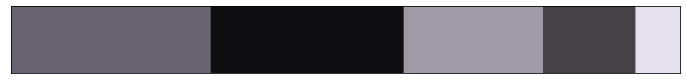

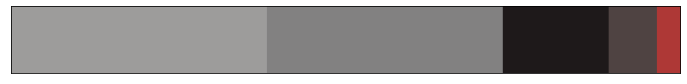

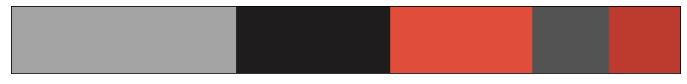

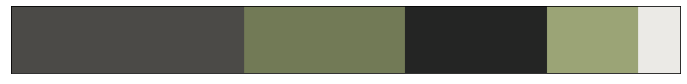

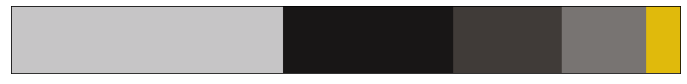

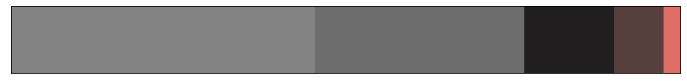

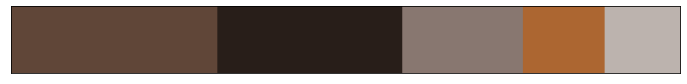

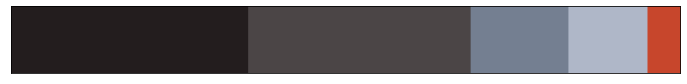

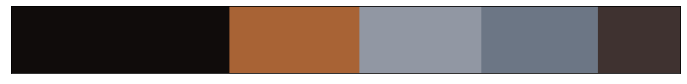

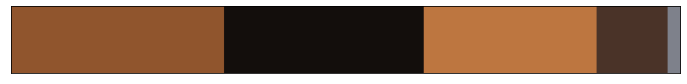

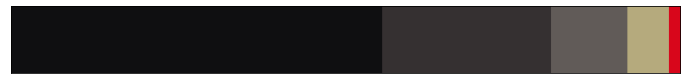

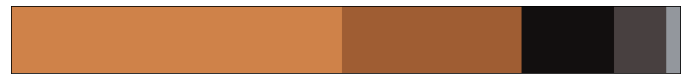

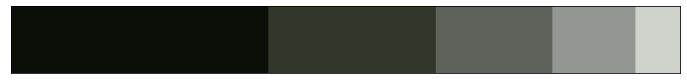

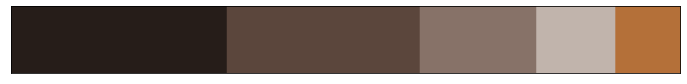

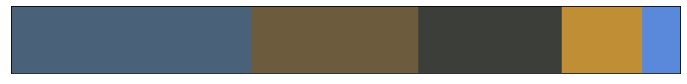

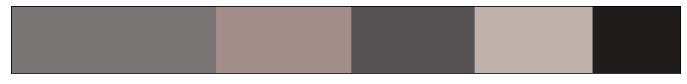

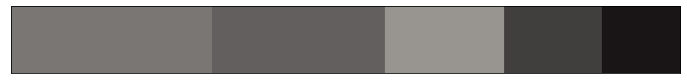

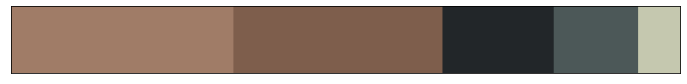

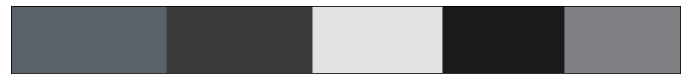

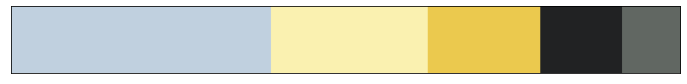

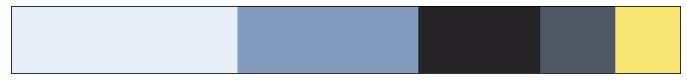

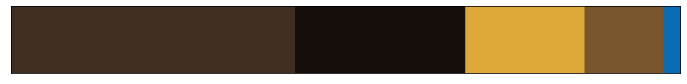

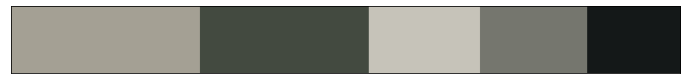

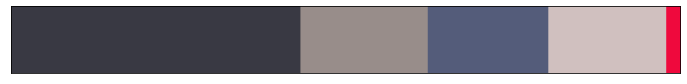

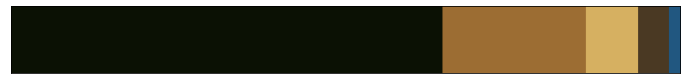

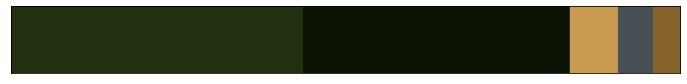

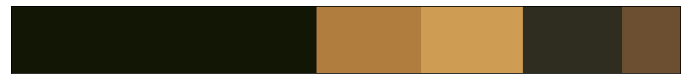

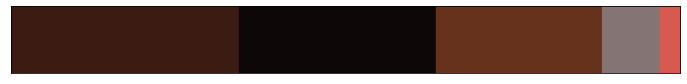

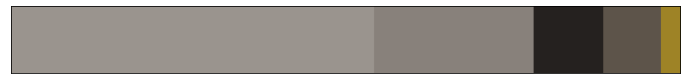

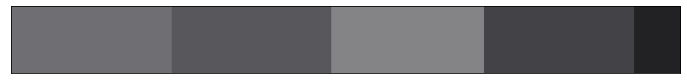

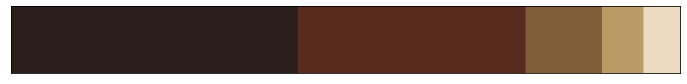

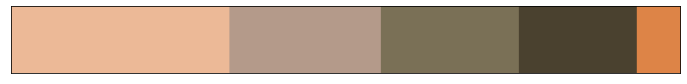

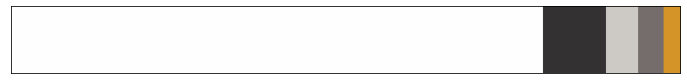

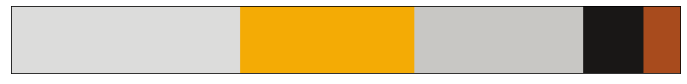

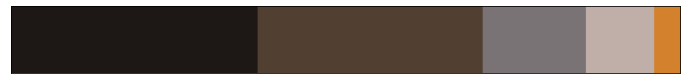

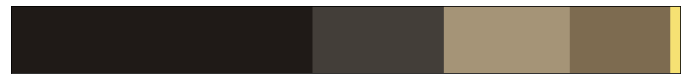

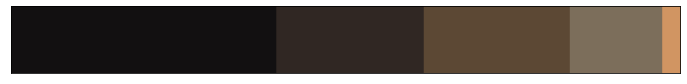

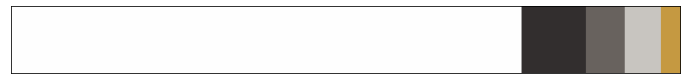

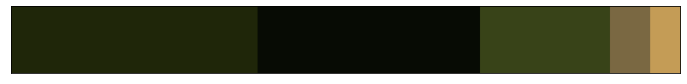

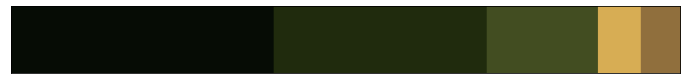

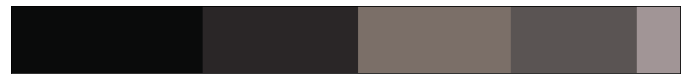

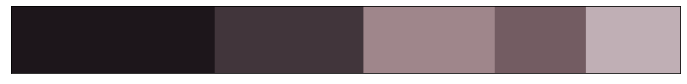

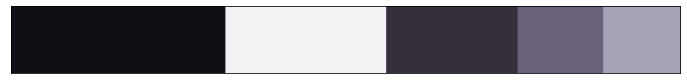

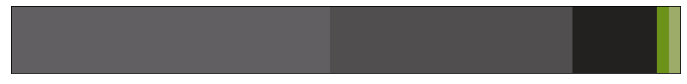

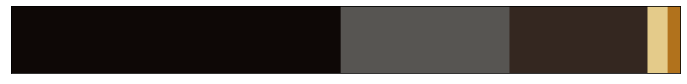

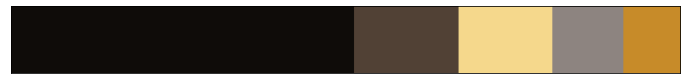

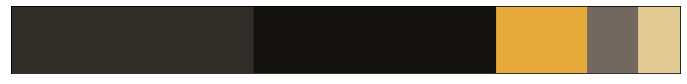

In [21]:
path_of_the_directory= 'C:/Users/Asus/Documents/SMU/Y4S2 (Y4S1)/(2) IS434 SA/Project/santacruzbicycles200/'
for filename in os.listdir(path_of_the_directory):
    f = os.path.join(filename)
    with open(path_of_the_directory + filename, "r") as json_file:
        path_to_image = path_of_the_directory + filename
        generateColours(path_to_image)